#     Estimating Counterfactual Energy Usage of Buildings with Machine Learning
<p> 
    
##    `Part-2-And.ipynb`

<p>
    
### by:  Steven Smiley

# Table of Contents (TOC)

* [0. Overall Purpose](#Code_Objective_0)
    * [0.1 Acknowledgments ](#Code_Objective_0_1)
    * [0.2 Background](#Code_Objective_0_2)
    * [0.3 References](#Code_Objective_0_3)
<p>
    
## Divide     
* [ `1. Part-1-Divide.ipynb`](#Code_Objective_1)<p> *Divide Data* into 16 datasets based on their `Site ID` <p>

    * [1.1: Import Libraries](#Code_Objective_1_1)
    * [1.2: Make Directories for Output Files](#Code_Objective_1_2)
    * [1.3: Import and View Data](#Code_Objective_1_3)
    * [1.4: Reduce Data Memory](#Code_Objective_1_4)
    * [1.5: Merge Data](#Code_Objective_1_5)
    * [1.6: Look at Data](#Code_Objective_1_6)
    * [1.7: Divide and Export Data](#Code_Objective_1_7)

<p>
    
## And    
* [ `2. Part-2-And.ipynb` ](#Code_Objective_2)<p> 
    *Exploratory Data Analysis* and *Cleaning* for each `Site ID`, <p> 
    repeat for all 16 sites ( `Split_Number_i` =1 to 16) <p>

    * [2.1: Split_Number_i](#Code_Objective_2_1)
    * [2.2: Import Libraries](#Code_Objective_2_2)
    * [2.3: Gather Directories for Output Files](#Code_Objective_2_3)
    * [2.4: Import and View Data for Split_Number_i](#Code_Objective_2_4)
    * [2.5: Reduce Data Memory](#Code_Objective_2_4)
    * [2.6: Units](#Code_Objective_2_6)
    * [2.7: Upsample](#Code_Objective_2_7)
        * [2.7.1: resample('H').mean()](#Code_Objective_2_7_1)
        * [2.7.2: missing_table()](#Code_Objective_2_7_2)
        * [2.7.3: dropna()](#Code_Objective_2_7_3)
        * [2.7.4: fillna()](#Code_Objective_2_7_4)
        * [2.7.5: interpolate()](#Code_Objective_2_7_5)
        * [2.7.6: pad()](#Code_Objective_2_7_6)
        * [2.7.7: bfill()](#Code_Objective_2_7_6)
        * [2.7.7: fillna()](#Code_Objective_2_7_7)
    * [2.8: Look for Outliers](#Code_Objective_2_8)
        * [2.8.1: Drop Meter Readings with High Values](#Code_Objective_2_8_1)
        * [2.8.2: Drop Meter Readings with Zero Values](#Code_Objective_2_8_2)
    * [2.9: Verify Clean Data Before Export](#Code_Objective_2_9)
    * [2.10: Export Clean Data](#Code_Objective_2_10)
    
## Conquer
* [ `3. Part-3-Conquer.ipynb` ](#Code_Objective_3)<p> 
    *Feature Engineering*, *Feature Extraction*, and *Machine Learning* with Training, Validation and Testing for each `Site ID`, <p> 
    repeat for all 16 sites ( `Split_Number_i` =1 to 16) <p>

    * [3.1: Split_Number_i](#Code_Objective_3_1)
    * [3.2: run_type](#Code_Objective_3_2)
        * [3.2.1: FE_type](#Code_Objective_3_2_1)
    * [3.3: Import Libraries](#Code_Objective_3_3)
    * [3.4: Gather Directories for Output Files](#Code_Objective_3_4)
    * [3.5: Import and View Data for Split_Number_i](#Code_Objective_3_5)
    * [3.6: Split the Data for Training and Testing](#Code_Objective_3_6)
    * [3.7: Reduce Data Memory](#Code_Objective_3_7)
    * [3.8: Feature Engineering and Feature Extraction](#Code_Objective_3_8)
    * [3.9: Machine Learning](#Code_Objective_3_9)
        * [3.9.1: Machine Learning: Light GBM: K-fold Train/Val](#Code_Objective_3_9_1)
        * [3.9.2: Machine Learning: Light GBM: Prediction with Test](#Code_Objective_3_9_2)
        * [3.9.3: Machine Learning: Light GBM: Feature Importance Plot](#Code_Objective_3_9_3)
    * [3.10: Statistical Analysis of Results](#Code_Objective_3_10)
        * [3.10.1: Regression Plot of Prediction vs. Actual](#Code_Objective_3_10_1)
        * [3.10.2: Bland-Altman Plot of Prediction vs. Actual](#Code_Objective_3_10_2)
    * [3.11: Counterfactual Energy Estimation Scatter Plots](#Code_Objective_3_10)
        * [3.11.1: Counterfactual Energy Estimation Building Plots by Meter](#Code_Objective_3_11_1)
        * [3.11.2: Counterfactual Energy Estimation Plots by Meter](#Code_Objective_3_11_2)
    * [3.12: Export Models](#Code_Objective_3_12)
    * [3.13: Predict on Unknown Future Test Data](#Code_Objective_3_13)
    * [3.14: Export Final Results for Site ID](#Code_Objective_3_14)
        
        
    
    
## All Site Ids
* [ `4. Part-4-AllSiteIds.ipynb` ](#Code_Objective_4)<p> 
    Combines all 16 `Site IDs` results for submission and makes counterfactual energy estimation figures. <p> 

    * [4.1: Import Libraries](#Code_Objective_4_1)
    * [4.2: Gather Directories for Output Files](#Code_Objective_4_2)
    * [4.3: Import and Combine Data for each Split_Number_i for Final Submission](#Code_Objective_4_3)
    * [4.4: Reduce Data Memory](#Code_Objective_4_4)
    * [4.5: Export Final Submission Results](#Code_Objective_4_5)
    * [4.6: Counterfactual Energy Estimation Plots for all Results](#Code_Objective_4_6)

# And
# 2.  `Part-2-And.ipynb` <a class="anchor" id="Code_Objective_2_0"></a>

## 2.1 Split_Number_i  <a class="anchor" id="Code_Objective_2_1"></a>

In [1]:
Split_Number_i = 15

## 2.2 Import Libraries <a class="anchor" id="Code_Objective_2_2"></a>

In [2]:
## Sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc #plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas
import pandas as pd # data processing, CSV file I/O (e.i. pd.read_csv)

## Numpy
import numpy as np

## Misc
import warnings
import os # Get Current Directory
import joblib
from time import time
from scipy import stats
import itertools
import subprocess
import gc
import pickle
import math

### Hide Warnings

In [3]:
warnings.filterwarnings("ignore")
pd.set_option('mode.chained_assignment', None)

### Get Current Directory

In [4]:
currentDirectory=os.getcwd()
print(currentDirectory)

C:\Users\surbh\OneDrive - Durham College\Attachments\Artificial Intelligence\capstone-2\Final_Project


## 2.3 Gather Directories for Output Files <a class="anchor" id="Code_Objective_2_3"></a>

#### Function: folder_path

In [5]:
def folder_path(path):
    try:
        print(path)
    except OSError:
        return(path)
    else:
        return(path)
    return(path)

In [6]:
default_path = 'C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_Project'
OUTPUT_path = 'C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_Project'
OUTPUT_path = OUTPUT_path+'Outputs/'

In [7]:
Splits =['Site_ID_0',
         'Site_ID_1',
         'Site_ID_2',
         'Site_ID_3',
         'Site_ID_4',
         'Site_ID_5',
         'Site_ID_6',
         'Site_ID_7',
         'Site_ID_8',
         'Site_ID_9',
         'Site_ID_10',
         'Site_ID_11',
         'Site_ID_12',
         'Site_ID_13',
         'Site_ID_14',
         'Site_ID_15']

In [8]:
OUTPUT_split_path = [None]*len(Splits)
models_path = [None]*len(Splits)
figures_path = [None]*len(Splits)
count=0
for Split_Number in list(Splits):   
    # OUTPUTS: Folder for storing OUTPUTS
    print(Split_Number)
    folder_path(OUTPUT_path)
    OUTPUT_split_path[count]=folder_path(OUTPUT_path+Split_Number)
    # Models: Folder for storing models
    models_path[count]=folder_path(OUTPUT_split_path[count]+'/Models')
    # Figures: Folder for storing figures
    figures_path[count]=folder_path(OUTPUT_split_path[count]+'/Figures')
    count+=1

Site_ID_0
C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/
C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/Site_ID_0
C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/Site_ID_0/Models
C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/Site_ID_0/Figures
Site_ID_1
C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/
C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/Site_ID_1
C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/Site_ID_1/Models
C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/Site_ID_1/Figures
Site_ID_2
C:/Use

## 2.4. Import and View Data for Split_Number_i: <a class="anchor" id="Code_Objective_2_4"></a>

### Open Directories for Input Files

#### Function: file_loader

In [9]:
def file_loader(file_path): 
    try:
        data= pd.read_pickle(file_path)
    except OSError:
        print ("Trouble Loading: ",file_path)
    else:
        print ("Successfully loaded Input file: ",file_path)
    return data

In [10]:
count=0
for Split_Number in list(Splits):  
    if count == Split_Number_i:
        train_i = os.path.join(OUTPUT_split_path[count],
                               'site_id-{}-train.pkl'.format(count))
        data_train = file_loader(train_i)
        
        test_i = os.path.join(OUTPUT_split_path[count],
                              'site_id-{}-test.pkl'.format(count))
        data_test = file_loader(test_i)
    count+=1

Successfully loaded Input file:  C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/Site_ID_15\site_id-15-train.pkl
Successfully loaded Input file:  C:/Users/surbh/OneDrive - Durham College/Attachments/Artificial Intelligence/capstone-2/Final_ProjectOutputs/Site_ID_15\site_id-15-test.pkl


In [11]:
data_train.head(5) # view the first 5 rows

,index,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
2064,2064,1325,3,2016-01-01 00:00:00,320.204987,15,Entertainment/public assembly,155177,1915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,2065,1326,0,2016-01-01 00:00:00,89.324997,15,Office,46981,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2066,2066,1326,1,2016-01-01 00:00:00,2.281900,15,Office,46981,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2067,2067,1326,2,2016-01-01 00:00:00,1405.099976,15,Office,46981,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2068,2068,1327,0,2016-01-01 00:00:00,165.824997,15,Education,98125,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_test.head(5) # view the first 5 rows

,index,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
37198321,37198321,37198321,1325,0,2017-01-01 01:00:00,15,Entertainment/public assembly,155177,1915.0,NaN,0.0,NaN,-2.199219,-1.0,1008.5,160.0,4.601562
37198322,37198322,37198322,1325,3,2017-01-01 01:00:00,15,Entertainment/public assembly,155177,1915.0,NaN,0.0,NaN,-2.199219,-1.0,1008.5,160.0,4.601562
37198323,37198323,37198323,1326,0,2017-01-01 01:00:00,15,Office,46981,1962.0,NaN,0.0,NaN,-2.199219,-1.0,1008.5,160.0,4.601562
37198324,37198324,37198324,1326,1,2017-01-01 01:00:00,15,Office,46981,1962.0,NaN,0.0,NaN,-2.199219,-1.0,1008.5,160.0,4.601562
37198325,37198325,37198325,1326,2,2017-01-01 01:00:00,15,Office,46981,1962.0,NaN,0.0,NaN,-2.199219,-1.0,1008.5,160.0,4.601562


## 2.5 Reduce Data Memory <a class="anchor" id="Code_Objective_2_5"></a>

This function comes from [CeasarLupum](https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction) [[Ref. 11]](#Ref_11)
Please go and give him some upvotes! This is an excellent function to reduce memory for our problem.

#### Function: reduce_mem_usage

In [13]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [14]:
data_train= reduce_mem_usage(data_train)
data_test= reduce_mem_usage(data_test)

Mem. usage decreased to 107.32 Mb (0.0% reduction)
Mem. usage decreased to 267.33 Mb (-3.2% reduction)


## 2.6 Units <a class="anchor" id="Code_Objective_2_6"></a>

### Units: Meter Reading 
Fix the units for Site 0, meter = 0 (electric), per the unit correction.
Multiply by 0.2931 to get model inputs into kWh like other sites, and 3.4118 to get back to kBTU for scoring.

In [15]:
data_train[(data_train['site_id'] == 0)&(data_train['meter']==0)]['meter_reading']

Series([], Name: meter_reading, dtype: float16)

In [16]:
data_train.loc[(data_train['site_id'] == 0) & (data_train['meter'] == 0),
          'meter_reading'] = data_train[(data_train['site_id'] == 0) & (data_train['meter'] == 0)]['meter_reading'] * 0.2931

In [17]:
[data_train.loc[(data_train['site_id'] == 0)&(data_train['meter']==0),'meter_reading']]

[Series([], Name: meter_reading, dtype: float16)]

### Units: Air Temperature
Change from Degrees Celsius to Fahrenheit because it is easier for me to interpret.

\begin{equation*}
\ {^{\circ}F} =  32^{\circ}+{\frac{9}{5}} {}^{\circ}C
\end{equation*}

In [18]:
data_test[['air_temperature','dew_temperature']]

,air_temperature,dew_temperature
37198321,0.0,-2.199219
37198322,0.0,-2.199219
37198323,0.0,-2.199219
37198324,0.0,-2.199219
37198325,0.0,-2.199219
...,...,...
41697595,NaN,NaN
41697596,NaN,NaN
41697597,NaN,NaN
41697598,NaN,NaN


In [19]:
data_train['air_temperature'] = (data_train['air_temperature'] * (9./5.))+32.
data_test['air_temperature'] = (data_test['air_temperature'] * (9./5.))+32.

In [20]:
data_train['dew_temperature'] = (data_train['dew_temperature'] * (9./5.))+32.
data_test['dew_temperature'] = (data_test['dew_temperature'] * (9./5.))+32.

In [21]:
data_test[['air_temperature','dew_temperature']]

,air_temperature,dew_temperature
37198321,32.0,28.046875
37198322,32.0,28.046875
37198323,32.0,28.046875
37198324,32.0,28.046875
37198325,32.0,28.046875
...,...,...
41697595,NaN,NaN
41697596,NaN,NaN
41697597,NaN,NaN
41697598,NaN,NaN


In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1815054 entries, 2064 to 20216099
Data columns (total 17 columns):
index                 int32
building_id           int16
meter                 int8
timestamp             object
meter_reading         float16
site_id               int8
primary_use           object
square_feet           int32
year_built            float16
floor_count           float64
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
dtypes: float16(9), float64(1), int16(1), int32(2), int8(2), object(2)
memory usage: 107.3+ MB


In [23]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380000 entries, 37198321 to 41697599
Data columns (total 17 columns):
index                 int32
row_id                int32
building_id           int16
meter                 int8
timestamp             object
site_id               int8
primary_use           object
square_feet           int32
year_built            float16
floor_count           float64
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
dtypes: float16(8), float64(1), int16(1), int32(3), int8(2), object(2)
memory usage: 267.3+ MB


Rename the `primary_use` to Categorical instead of Object.  Much easier to work with.

In [24]:
data_train['primary_use']=pd.Categorical(data_train['primary_use'])
data_test['primary_use']=pd.Categorical(data_test['primary_use'])

I know this is a little Feature Engineering in order to encode it like this, but it helps make cleaning easier.

In [25]:
# Encode Categorical Data (primary use)
LE = LabelEncoder()
LE.fit(data_train['primary_use'])
list(LE.classes_)
data_train["primary_use"] = LE.transform(data_train["primary_use"])
data_test["primary_use"] = LE.transform(data_test["primary_use"])

In [26]:
LE_name_mapping = dict(zip(LE.classes_, LE.transform(LE.classes_)))
print(LE_name_mapping)

{'Education': 0, 'Entertainment/public assembly': 1, 'Healthcare': 2, 'Lodging/residential': 3, 'Manufacturing/industrial': 4, 'Office': 5, 'Public services': 6, 'Religious worship': 7, 'Technology/science': 8, 'Utility': 9}


In [27]:
data_train['primary_use']=data_train['primary_use'].astype(np.int8)
data_test['primary_use']=data_test['primary_use'].astype(np.int8)

In [28]:
data_train.head(5) # view the first 5 rows

,index,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
2064,2064,1325,3,2016-01-01 00:00:00,320.25000,15,1,155177,1915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,2065,1326,0,2016-01-01 00:00:00,89.31250,15,5,46981,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2066,2066,1326,1,2016-01-01 00:00:00,2.28125,15,5,46981,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2067,2067,1326,2,2016-01-01 00:00:00,1405.00000,15,5,46981,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2068,2068,1327,0,2016-01-01 00:00:00,165.87500,15,0,98125,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_test.head(5) # view the first 5 rows

,index,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
37198321,37198321,37198321,1325,0,2017-01-01 01:00:00,15,1,155177,1915.0,NaN,32.0,NaN,28.046875,-1.0,1008.5,160.0,4.601562
37198322,37198322,37198322,1325,3,2017-01-01 01:00:00,15,1,155177,1915.0,NaN,32.0,NaN,28.046875,-1.0,1008.5,160.0,4.601562
37198323,37198323,37198323,1326,0,2017-01-01 01:00:00,15,5,46981,1962.0,NaN,32.0,NaN,28.046875,-1.0,1008.5,160.0,4.601562
37198324,37198324,37198324,1326,1,2017-01-01 01:00:00,15,5,46981,1962.0,NaN,32.0,NaN,28.046875,-1.0,1008.5,160.0,4.601562
37198325,37198325,37198325,1326,2,2017-01-01 01:00:00,15,5,46981,1962.0,NaN,32.0,NaN,28.046875,-1.0,1008.5,160.0,4.601562


In [30]:
data_train['precip_depth_1_hr'].unique()

array([ nan,  -1.,   3.,   8.,  41.,  58.,  15.,  23.,   5.,  28.,  18.,
        33.,  20.,  10.,  13.,  86.,  61.,  53.,  36.,  71.,  43.,   2.,
        12.,  38.,  46.,  97.,  79.,  30., 104.,  66., 333.,  25.,  89.,
       147., 211., 127.,  17., 180.,  64.,  48., 239.,  56.,  81.,   7.,
        22.])

In [31]:
data_test['precip_depth_1_hr'].unique()

array([ -1.,  nan,   3.,   5.,  20.,  10.,  13.,   8.,  15.,  38.,  18.,
        33.,  23.,  25.,  61.,  28.,  58.,  35.,   7.,   2.,  30.,  43.,
        66.,  41., 109., 132.,  46.,  56.,  17., 114.,  76., 165., 112.,
        51.,  74., 442.,  97.,  36.,  79.,  48.,  81.,  64., 104., 191.,
        12.,  94., 130.,  91.,  27.,  22.,  83.,  45.,  40., 137., 152.])

## 2.7 Upsample <a class="anchor" id="Code_Objective_2_7"></a>

### 2.7.1 resample('H').mean() <a class="anchor" id="Code_Objective_2_7_1"></a>

In [32]:
data_train['timestamp']=pd.to_datetime(data_train["timestamp"],format='%Y-%m-%d %H')
data_train=data_train.set_index('timestamp')

data_test['timestamp']=pd.to_datetime(data_test["timestamp"],format='%Y-%m-%d %H')
data_test=data_test.set_index('timestamp')

grouplist=['building_id','meter','site_id','primary_use','square_feet']


data_train=data_train.groupby(grouplist).resample('H').mean()
data_train=data_train.drop(grouplist,axis=1)


data_test=data_test.groupby(grouplist).resample('H').mean()
data_test=data_test.drop(grouplist,axis=1)


data_train = reduce_mem_usage(data_train)
data_test = reduce_mem_usage(data_test)

Mem. usage decreased to 75.91 Mb (9.7% reduction)
Mem. usage decreased to 163.04 Mb (0.0% reduction)


### 2.7.2 missing_table() <a class="anchor" id="Code_Objective_2_7_2"></a>

#### Function: missing_table

In [33]:
def missing_table(data_name):
    non_null_counts = data_name.count() # how many non-null values are in the column
    null_counts = data_name.isnull().sum() # how many null values are in the column
    total_counts = non_null_counts+null_counts # how many total counts
    percent_missing= round(100*null_counts/total_counts,1)
    min_non_null = data_name.min()
    median_non_null = data_name.quantile(q=0.5)
    max_non_null = data_name.max()
    missing_data=pd.concat([total_counts,non_null_counts,
                            null_counts,percent_missing,
                            min_non_null,median_non_null,
                            max_non_null],
                           axis=1,
                           keys=['Total Counts','Non-Null Counts',
                                 'Null Counts','Percent Missing(%)',
                                 'Non-Null Minimum','Non-Null Median',
                                 'Non-Null Maximum'])
    return missing_data

In [34]:
missing_list_train = data_train.columns
missing_list_test = data_test.columns

In [35]:
missing_table(pd.DataFrame(data_train[missing_list_train]))

,Total Counts,Non-Null Counts,Null Counts,Percent Missing(%),Non-Null Minimum,Non-Null Median,Non-Null Maximum
index,2149194,1815054,334140,15.5,2064.00000,1.117334e+07,2.021610e+07
meter_reading,2149194,1815054,334140,15.5,0.00000,8.387500e+01,2.686400e+04
year_built,2149194,1666674,482520,22.5,1902.00000,1.963000e+03,2.014000e+03
floor_count,2149194,0,2149194,100.0,NaN,NaN,NaN
air_temperature,2149194,1743966,405228,18.9,-11.03125,5.200000e+01,9.300000e+01
cloud_coverage,2149194,875048,1274146,59.3,0.00000,0.000000e+00,9.000000e+00
dew_temperature,2149194,1743231,405963,18.9,-16.06250,4.406250e+01,7.593750e+01
precip_depth_1_hr,2149194,325420,1823774,84.9,-1.00000,-1.000000e+00,3.330000e+02
sea_level_pressure,2149194,1626256,522938,24.3,987.50000,1.017500e+03,1.042000e+03
wind_direction,2149194,1694020,455174,21.2,0.00000,1.700000e+02,3.600000e+02


In [36]:
missing_table(pd.DataFrame(data_test[missing_list_test]))

,Total Counts,Non-Null Counts,Null Counts,Percent Missing(%),Non-Null Minimum,Non-Null Median,Non-Null Maximum
index,4380000,4380000,0,0.0,3.719832e+07,3.938832e+07,4.169760e+07
row_id,4380000,4380000,0,0.0,3.719832e+07,3.938832e+07,4.169760e+07
year_built,4380000,4029600,350400,8.0,1.902000e+03,1.963000e+03,2.014000e+03
floor_count,4380000,0,4380000,100.0,NaN,NaN,NaN
air_temperature,4380000,4297750,82250,1.9,-7.062500e+00,4.893750e+01,9.393750e+01
cloud_coverage,4380000,1809250,2570750,58.7,0.000000e+00,0.000000e+00,9.000000e+00
dew_temperature,4380000,4297500,82500,1.9,-1.103125e+01,4.206250e+01,7.500000e+01
precip_depth_1_hr,4380000,1041500,3338500,76.2,-1.000000e+00,-1.000000e+00,4.420000e+02
sea_level_pressure,4380000,4063000,317000,7.2,9.845000e+02,1.017500e+03,1.045000e+03
wind_direction,4380000,4192500,187500,4.3,0.000000e+00,1.700000e+02,3.600000e+02


### 2.7.3 dropna() <a class="anchor" id="Code_Objective_2_7_3"></a>

In [37]:
# Drop Any Columns with more than 40% missing data for the site
thresh = len(data_train)*.6
data_train.dropna(thresh = thresh, axis = 1, inplace = True)
print(thresh)

thresh = len(data_test)*.6
data_test.dropna(thresh = thresh, axis = 1, inplace = True)
print(thresh)

1289516.4
2628000.0


### 2.7.4 fillna() <a class="anchor" id="Code_Objective_2_7_4"></a>

#### keep track of original index for reference

set new values to -1 to recognize

In [38]:
data_train['index'].fillna(-1, inplace = True)
data_train['original_index']=data_train['index'].astype('int32')
data_train.drop(['index'],axis=1,inplace=True)
#data_train=data_train.reset_index()

In [39]:
data_test['index'].fillna(-1, inplace = True)
data_test['original_index']=data_test['index'].astype('int32')
data_test.drop(['index','row_id'],axis=1,inplace=True)
#data_test=data_test.reset_index()

### 2.7.5 interpolate() <a class="anchor" id="Code_Objective_2_7_5"></a>

In [40]:
for name in list(data_train):
    if name == 'meter_reading':
        data_train['meter_reading']=data_train['meter_reading'].interpolate()
    if name == 'air_temperature':
        data_train['air_temperature']=data_train['air_temperature'].interpolate()
    if name == 'dew_temperature':
        data_train['dew_temperature']=data_train['dew_temperature'].interpolate()
    if name == 'cloud_coverage':
        data_train['cloud_coverage']=data_train['cloud_coverage'].interpolate()
    if name == 'precip_depth_1_hr':
        data_train['precip_depth_1_hr']=data_train['precip_depth_1_hr'].interpolate()
    if name == 'sea_level_pressure':
        data_train['sea_level_pressure']=data_train['sea_level_pressure'].interpolate()
    if name == 'wind_direction':
        data_train['wind_direction']=data_train['wind_direction'].interpolate()
    if name == 'wind_speed':
        data_train['wind_speed']=data_train['wind_speed'].interpolate()
        
for name in list(data_test):
    if name == 'air_temperature':
        data_test['air_temperature']=data_test['air_temperature'].interpolate()
    if name == 'dew_temperature':
        data_test['dew_temperature']=data_test['dew_temperature'].interpolate()
    if name == 'cloud_coverage':
        data_test['cloud_coverage']=data_test['cloud_coverage'].interpolate()
    if name == 'precip_depth_1_hr':
        data_test['precip_depth_1_hr']=data_test['precip_depth_1_hr'].interpolate()
    if name == 'sea_level_pressure':
        data_test['sea_level_pressure']=data_test['sea_level_pressure'].interpolate()
    if name == 'wind_direction':
        data_test['wind_direction']=data_test['wind_direction'].interpolate()
    if name == 'wind_speed':
        data_test['wind_speed']=data_test['wind_speed'].interpolate()

In [41]:
data_train.isnull().sum()

meter_reading              0
year_built            482520
air_temperature            0
dew_temperature            0
sea_level_pressure         0
wind_direction             0
wind_speed                 0
original_index             0
dtype: int64

In [42]:
data_test.isnull().sum()

year_built            350400
air_temperature            1
dew_temperature            1
sea_level_pressure         1
wind_direction             1
wind_speed                 1
original_index             0
dtype: int64

### 2.7.6  pad() <a class="anchor" id="Code_Objective_2_7_6"></a>

In [43]:
data_train=data_train.groupby(grouplist).pad()
data_test=data_test.groupby(grouplist).pad()

In [44]:
data_train.head()

meter_reading  \
building_id meter site_id primary_use square_feet timestamp                            
1325        0     15      1           155177      2016-09-29 14:00:00      10.500000   
                                                  2016-09-29 15:00:00      13.273438   
                                                  2016-09-29 16:00:00      15.828125   
                                                  2016-09-29 17:00:00      15.976562   
                                                  2016-09-29 18:00:00      16.453125   

                                                                       year_built  \
building_id meter site_id primary_use square_feet timestamp                         
1325        0     15      1           155177      2016-09-29 14:00:00      1915.0   
                                                  2016-09-29 15:00:00      1915.0   
                                                  2016-09-29 16:00:00      1915.0   
                                                  2016-09-29 17:00:00      1915.0   
                                                  2016-09-29 18:00:00      1915.0   

                                                                       air_temperature  \
building_id meter site_id primary_use square_feet timestamp                              
1325        0     15      1           155177      2016-09-29 14:00:00         55.03125   
                                                  2016-09-29 15:00:00         55.03125   
                                                  2016-09-29 16:00:00         55.93750   
                                                  2016-09-29 17:00:00         57.00000   
                                                  2016-09-29 18:00:00         57.00000   

                                                                       dew_temperature  \
building_id meter site_id primary_use square_feet timestamp                              
1325        0     15      1           155177      2016-09-29 14:00:00         52.00000   
                                                  2016-09-29 15:00:00         53.06250   
                                                  2016-09-29 16:00:00         53.96875   
                                                  2016-09-29 17:00:00         55.03125   
                                                  2016-09-29 18:00:00         55.03125   

                                                                       sea_level_pressure  \
building_id meter site_id primary_use square_feet timestamp                                 
1325        0     15      1           155177      2016-09-29 14:00:00              1027.0   
                                                  2016-09-29 15:00:00              1027.0   
                                                  2016-09-29 16:00:00              1028.0   
                                                  2016-09-29 17:00:00              1028.0   
                                                  2016-09-29 18:00:00              1028.0   

                                                                       wind_direction  \
building_id meter site_id primary_use square_feet timestamp                             
1325        0     15      1           155177      2016-09-29 14:00:00            90.0   
                                                  2016-09-29 15:00:00            90.0   
                                                  2016-09-29 16:00:00           110.0   
                                                  2016-09-29 17:00:00           110.0   
                                                  2016-09-29 18:00:00           100.0   

                                                                       wind_speed  \
building_id meter site_id primary_use square_feet timestamp                         
1325        0     15      1           155177      2016-09-29 14:00:00    3.599609   
                                                  2016-09-29 15:0

In [45]:
data_train.isnull().sum()

meter_reading              0
year_built            175680
air_temperature            0
dew_temperature            0
sea_level_pressure         0
wind_direction             0
wind_speed                 0
original_index             0
dtype: int64

In [46]:
data_test.isnull().sum()

year_built            350400
air_temperature            1
dew_temperature            1
sea_level_pressure         1
wind_direction             1
wind_speed                 1
original_index             0
dtype: int64

### 2.7.7 bfill() <a class="anchor" id="Code_Objective_2_7_7"></a>

In [47]:
data_train=data_train.groupby(grouplist).bfill()
data_test=data_test.groupby(grouplist).bfill()

In [48]:
data_train=data_train.reset_index()
data_test=data_test.reset_index()

In [49]:
data_train.head()

,building_id,meter,site_id,primary_use,square_feet,timestamp,meter_reading,year_built,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,original_index
0,1325,0,15,1,155177,2016-09-29 14:00:00,10.500000,1915.0,55.03125,52.00000,1027.0,90.0,3.599609,14974813
1,1325,0,15,1,155177,2016-09-29 15:00:00,13.273438,1915.0,55.03125,53.06250,1027.0,90.0,4.101562,14977170
2,1325,0,15,1,155177,2016-09-29 16:00:00,15.828125,1915.0,55.93750,53.96875,1028.0,110.0,3.599609,14979529
3,1325,0,15,1,155177,2016-09-29 17:00:00,15.976562,1915.0,57.00000,55.03125,1028.0,110.0,3.099609,14981888
4,1325,0,15,1,155177,2016-09-29 18:00:00,16.453125,1915.0,57.00000,55.03125,1028.0,100.0,4.601562,14984246


In [50]:
data_train.isnull().sum()

building_id                0
meter                      0
site_id                    0
primary_use                0
square_feet                0
timestamp                  0
meter_reading              0
year_built            175680
air_temperature            0
dew_temperature            0
sea_level_pressure         0
wind_direction             0
wind_speed                 0
original_index             0
dtype: int64

In [51]:
data_test.isnull().sum()

building_id                0
meter                      0
site_id                    0
primary_use                0
square_feet                0
timestamp                  0
year_built            350400
air_temperature            0
dew_temperature            0
sea_level_pressure         0
wind_direction             0
wind_speed                 0
original_index             0
dtype: int64

### 2.7.8 fillna()      <a class="anchor" id="Code_Objective_2_7_8"></a>

#### Site 0 Missing Notes:

#### Train

 #### Train
* Total Counts	 
* Non-Null Counts	 
* Null Counts	
* Percent Missing(%)	
* Non-Null Minimum	 
* Non-Null Median	 
* Non-Null Maximum

   
index	1094402	1076662	17740	1.6	0.000000	1.027939e+07	2.021386e+07
meter_reading	1094402	1076662	17740	1.6	0.000000	3.793095e+01	1.726110e+05
year_built	1094402	1076662	17740	1.6	1968.000000	2.001000e+03	2.016000e+03
floor_count	1094402	0	1094402	100.0	NaN	NaN	NaN
air_temperature	1094402	1076353	18049	1.6	35.062500	7.500000e+01	9.693750e+01
cloud_coverage	1094402	609258	485144	44.3	0.000000	2.000000e+00	9.000000e+00
dew_temperature	1094402	1076353	18049	1.6	15.078125	6.493750e+01	7.806250e+01
precip_depth_1_hr	1094402	1076559	17843	1.6	-1.000000	0.000000e+00	3.430000e+02
sea_level_pressure	1094402	1066367	28035	2.6	992.000000	1.018000e+03	1.030000e+03
wind_direction	1094402	1045412	48990	4.5	0.000000	1.400000e+02	3.600000e+02
wind_speed	1094402	1076662	17740	1.6	0.000000	3.099609e+00	1.539844e+01

#### Test

 #### Test
* Total Counts	 
* Non-Null Counts	 
* Null Counts	
* Percent Missing(%)	
* Non-Null Minimum	 
* Non-Null Median	 
* Non-Null Maximum

index	2260080	2260080	0	0.0	0.000000	1.130040e+06	2.260079e+06
row_id	2260080	2260080	0	0.0	0.000000	1.130040e+06	2.260079e+06
year_built	2260080	2260080	0	0.0	1968.000000	2.001000e+03	2.016000e+03
floor_count	2260080	0	2260080	100.0	NaN	NaN	NaN
air_temperature	2260080	2260080	0	0.0	26.968750	7.500000e+01	9.500000e+01
cloud_coverage	2260080	1287033	973047	43.1	0.000000	2.000000e+00	9.000000e+00
dew_temperature	2260080	2260080	0	0.0	12.921875	6.693750e+01	8.006250e+01
precip_depth_1_hr	2260080	2256210	3870	0.2	-1.000000	0.000000e+00	5.970000e+02
sea_level_pressure	2260080	2220219	39861	1.8	981.000000	1.018000e+03	1.036000e+03
wind_direction	2260080	2198547	61533	2.7	0.000000	1.300000e+02	3.600000e+02
wind_speed	2260080	2259822	258	0.0	0.000000	3.099609e+00	2.420312e+01

#### Site 1 Missing Notes:

In [52]:
if Split_Number_i == 1:
    missing_data_train_year_built = missing_table(pd.DataFrame(data_train['year_built']))
    replacement = float(missing_data_train_year_built['Non-Null Median'].values)
    data_train['year_built'].fillna(replacement, inplace = True)
    missing_data_test_year_built = missing_table(pd.DataFrame(data_test['year_built']))
    replacement = float(missing_data_test_year_built['Non-Null Median'].values)
    data_test['year_built'].fillna(replacement, inplace = True)

#### Train

#### Train
* Total Counts	 
* Non-Null Counts	 
* Null Counts	
* Percent Missing(%)	
* Non-Null Minimum	 
* Non-Null Median	 
* Non-Null Maximum

index	553392	553357	35	0.0	103.000000	9.952246e+06	20213924.00
meter_reading	553392	553357	35	0.0	0.000000	7.818750e+01	22704.00
year_built	553392	412827	140565	25.4	1900.000000	1.960000e+03	2007.00
floor_count	553392	553357	35	0.0	2.000000	6.000000e+00	16.00
air_temperature	553392	551971	1421	0.3	24.984375	5.231250e+01	91.25
cloud_coverage	553392	107155	446237	80.6	0.000000	0.000000e+00	9.00
dew_temperature	553392	551971	1421	0.3	15.984375	4.603125e+01	69.25
precip_depth_1_hr	553392	0	553392	100.0	NaN	NaN	NaN
sea_level_pressure	553392	548758	4634	0.8	973.500000	1.017500e+03	1046.00
wind_direction	553392	551845	1547	0.3	0.000000	2.200000e+02	360.00
wind_speed	553392	552034	1358	0.2	0.000000	3.599609e+00	18.50

#### Test

 #### Test
* Total Counts	 
* Non-Null Counts	 
* Null Counts	
* Percent Missing(%)	
* Non-Null Minimum	 
* Non-Null Median	 
* Non-Null Maximum

index	1103760	1103760	0	0.0	2.260080e+06	2.811960e+06	4.151325e+07
row_id	1103760	1103760	0	0.0	2.260080e+06	2.811960e+06	4.151325e+07
year_built	1103760	823440	280320	25.4	1.900000e+03	1.960000e+03	2.007000e+03
floor_count	1103760	1103760	0	0.0	2.000000e+00	6.000000e+00	1.600000e+01
air_temperature	1103760	1087695	16065	1.5	2.300000e+01	5.325000e+01	9.393750e+01
cloud_coverage	1103760	227682	876078	79.4	0.000000e+00	0.000000e+00	9.000000e+00
dew_temperature	1103760	1087695	16065	1.5	1.471875e+01	4.640625e+01	6.781250e+01
precip_depth_1_hr	1103760	0	1103760	100.0	NaN	NaN	NaN
sea_level_pressure	1103760	1084986	18774	1.7	9.720000e+02	1.016500e+03	1.040000e+03
wind_direction	1103760	1088766	14994	1.4	0.000000e+00	2.200000e+02	3.600000e+02
wind_speed	1103760	1089081	14679	1.3	0.000000e+00	3.599609e+00	1.850000e+01

#### Site 2 Missing Notes:

In [53]:
if Split_Number_i == 2:
    missing_data_train_year_built = missing_table(pd.DataFrame(data_train['year_built']))
    replacement = float(missing_data_train_year_built['Non-Null Median'].values)
    data_train['year_built'].fillna(replacement, inplace = True)
    missing_data_test_year_built = missing_table(pd.DataFrame(data_test['year_built']))
    replacement = float(missing_data_test_year_built['Non-Null Median'].values)
    data_test['year_built'].fillna(replacement, inplace = True)

#### Site 3 Missing Notes:

#### Site 4 Missing Notes:

In [54]:
if Split_Number_i == 4:
    missing_data_train_year_built = missing_table(pd.DataFrame(data_train['year_built']))
    replacement = float(missing_data_train_year_built['Non-Null Median'].values)
    data_train['year_built'].fillna(replacement, inplace = True)
    missing_data_test_year_built = missing_table(pd.DataFrame(data_test['year_built']))
    replacement = float(missing_data_test_year_built['Non-Null Median'].values)
    data_test['year_built'].fillna(replacement, inplace = True)

#### Site 5 Missing Notes:

In [55]:
if Split_Number_i == 5:
    missing_data_train_year_built = missing_table(pd.DataFrame(data_train['year_built']))
    replacement = float(missing_data_train_year_built['Non-Null Median'].values)
    data_train['year_built'].fillna(replacement, inplace = True)
    missing_data_test_year_built = missing_table(pd.DataFrame(data_test['year_built']))
    replacement = float(missing_data_test_year_built['Non-Null Median'].values)
    data_test['year_built'].fillna(replacement, inplace = True)

#### Site 6 Missing Notes:

#### Site 7 Missing Notes:

In [56]:
if Split_Number_i == 7:
    missing_data_train_year_built = missing_table(pd.DataFrame(data_train['year_built']))
    replacement = float(missing_data_train_year_built['Non-Null Median'].values)
    data_train['year_built'].fillna(replacement, inplace = True)
    missing_data_test_year_built = missing_table(pd.DataFrame(data_test['year_built']))
    replacement = float(missing_data_test_year_built['Non-Null Median'].values)
    data_test['year_built'].fillna(replacement, inplace = True)

#### Site 8 Missing Notes:

#### Site 9 Missing Notes:

#### Site 10 Missing Notes:

#### Site 11 Missing Notes:

#### Site 12 Missing Notes:

#### Site 13 Missing Notes:

#### Site 14 Missing Notes:

#### Site 15 Missing Notes:

In [57]:
if Split_Number_i == 15:
    missing_data_train_year_built = missing_table(pd.DataFrame(data_train['year_built']))
    replacement = float(missing_data_train_year_built['Non-Null Median'].values)
    data_train['year_built'].fillna(replacement, inplace = True)
    missing_data_test_year_built = missing_table(pd.DataFrame(data_test['year_built']))
    replacement = float(missing_data_test_year_built['Non-Null Median'].values)
    data_test['year_built'].fillna(replacement, inplace = True)

## 2.8 Look for Outliers:  <a class="anchor" id="Code_Objective_2_8"></a>

In [58]:
data_train=reduce_mem_usage(data_train)
data_test=reduce_mem_usage(data_test)

Mem. usage decreased to 71.74 Mb (47.0% reduction)
Mem. usage decreased to 137.84 Mb (48.4% reduction)


In [59]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149194 entries, 0 to 2149193
Data columns (total 14 columns):
building_id           int16
meter                 int8
site_id               int8
primary_use           int8
square_feet           int32
timestamp             datetime64[ns]
meter_reading         float16
year_built            float16
air_temperature       float16
dew_temperature       float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
original_index        int32
dtypes: datetime64[ns](1), float16(7), int16(1), int32(2), int8(3)
memory usage: 71.7 MB


In [60]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380000 entries, 0 to 4379999
Data columns (total 13 columns):
building_id           int16
meter                 int8
site_id               int8
primary_use           int8
square_feet           int32
timestamp             datetime64[ns]
year_built            float16
air_temperature       float16
dew_temperature       float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
original_index        int32
dtypes: datetime64[ns](1), float16(6), int16(1), int32(2), int8(3)
memory usage: 137.8 MB


### 2.8.1 Drop Meter Readings with High Values. <a class="anchor" id="Code_Objective_2_8_1"></a>

#### Drop Meter Reading's HIgher than 15,000 kWh.

In [61]:
data_train['meter_reading']

0          10.500000
1          13.273438
2          15.828125
3          15.976562
4          16.453125
             ...    
2149189     3.400391
2149190     2.699219
2149191     3.050781
2149192     3.125000
2149193     2.849609
Name: meter_reading, Length: 2149194, dtype: float16

In [62]:
data_train=data_train.drop((data_train.loc[data_train['meter_reading'] > 1.5e+04])['meter_reading'].index)

In [63]:
data_train['meter_reading']

0          10.500000
1          13.273438
2          15.828125
3          15.976562
4          16.453125
             ...    
2149189     3.400391
2149190     2.699219
2149191     3.050781
2149192     3.125000
2149193     2.849609
Name: meter_reading, Length: 2148753, dtype: float16

### Drop Meter Readings with Zero Values. <a class="anchor" id="Code_Objective_2_8_2"></a>

#### Drop Zero Value Meter Readings.

In [64]:
data_train['meter_reading']

0          10.500000
1          13.273438
2          15.828125
3          15.976562
4          16.453125
             ...    
2149189     3.400391
2149190     2.699219
2149191     3.050781
2149192     3.125000
2149193     2.849609
Name: meter_reading, Length: 2148753, dtype: float16

In [65]:
data_train=data_train.drop((data_train.loc[data_train['meter_reading'] == 0])['meter_reading'].index)

In [66]:
data_train['meter_reading']

0          10.500000
1          13.273438
2          15.828125
3          15.976562
4          16.453125
             ...    
2149189     3.400391
2149190     2.699219
2149191     3.050781
2149192     3.125000
2149193     2.849609
Name: meter_reading, Length: 2049515, dtype: float16

## 2.9 Verify Clean Data Before Export <a class="anchor" id="Code_Objective_2_9"></a>

### sns.distplot()

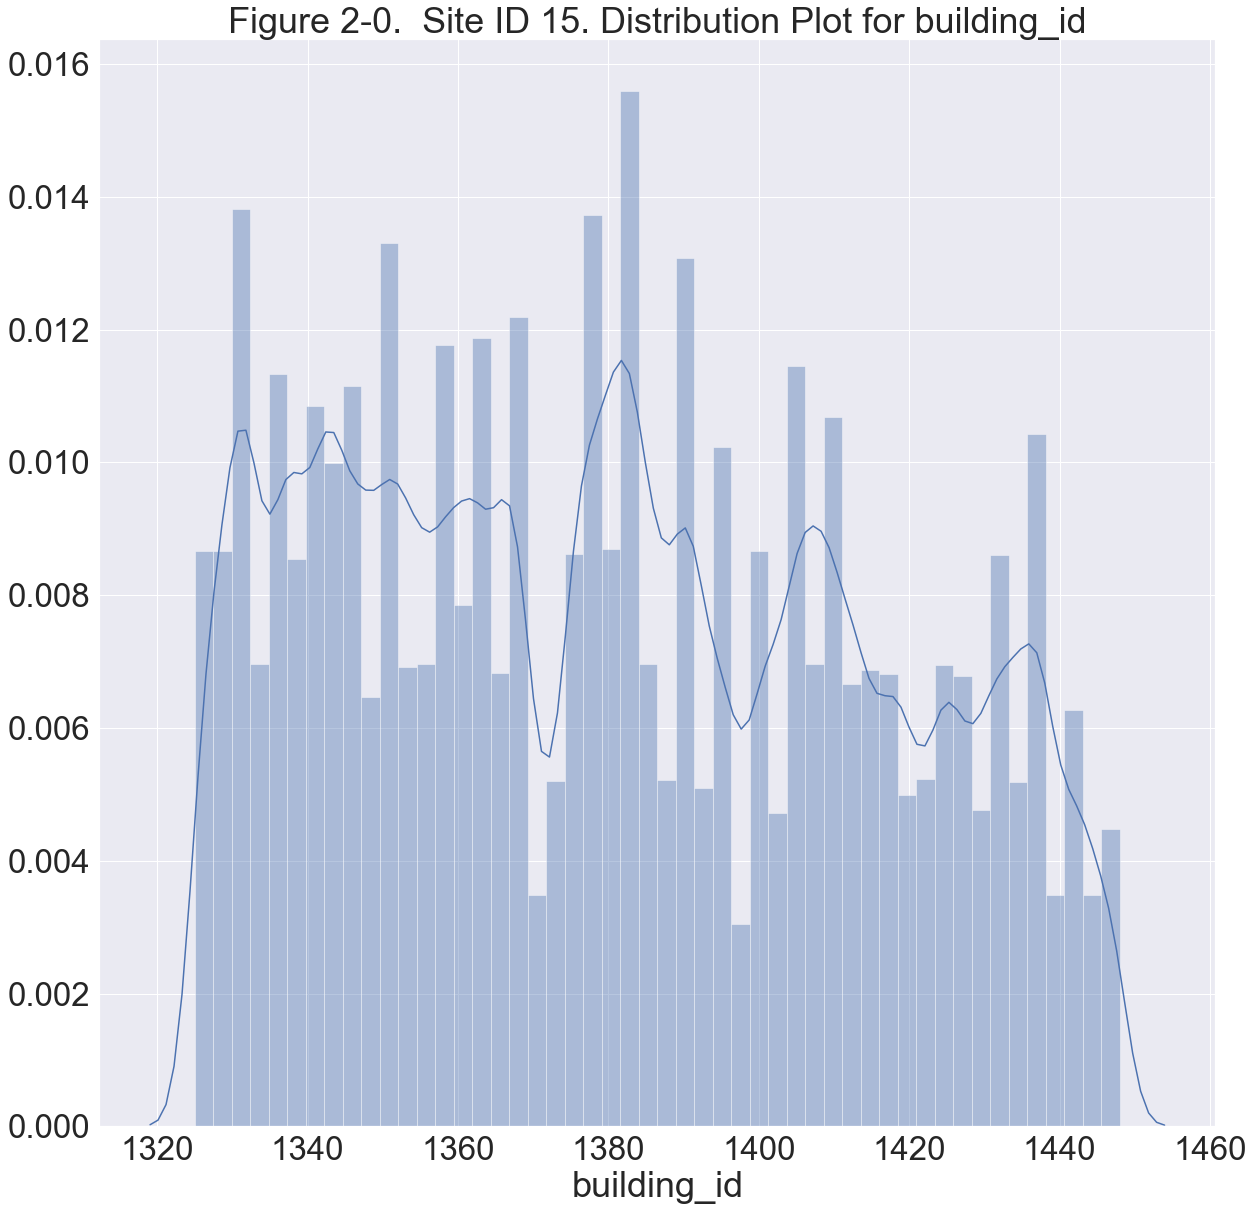

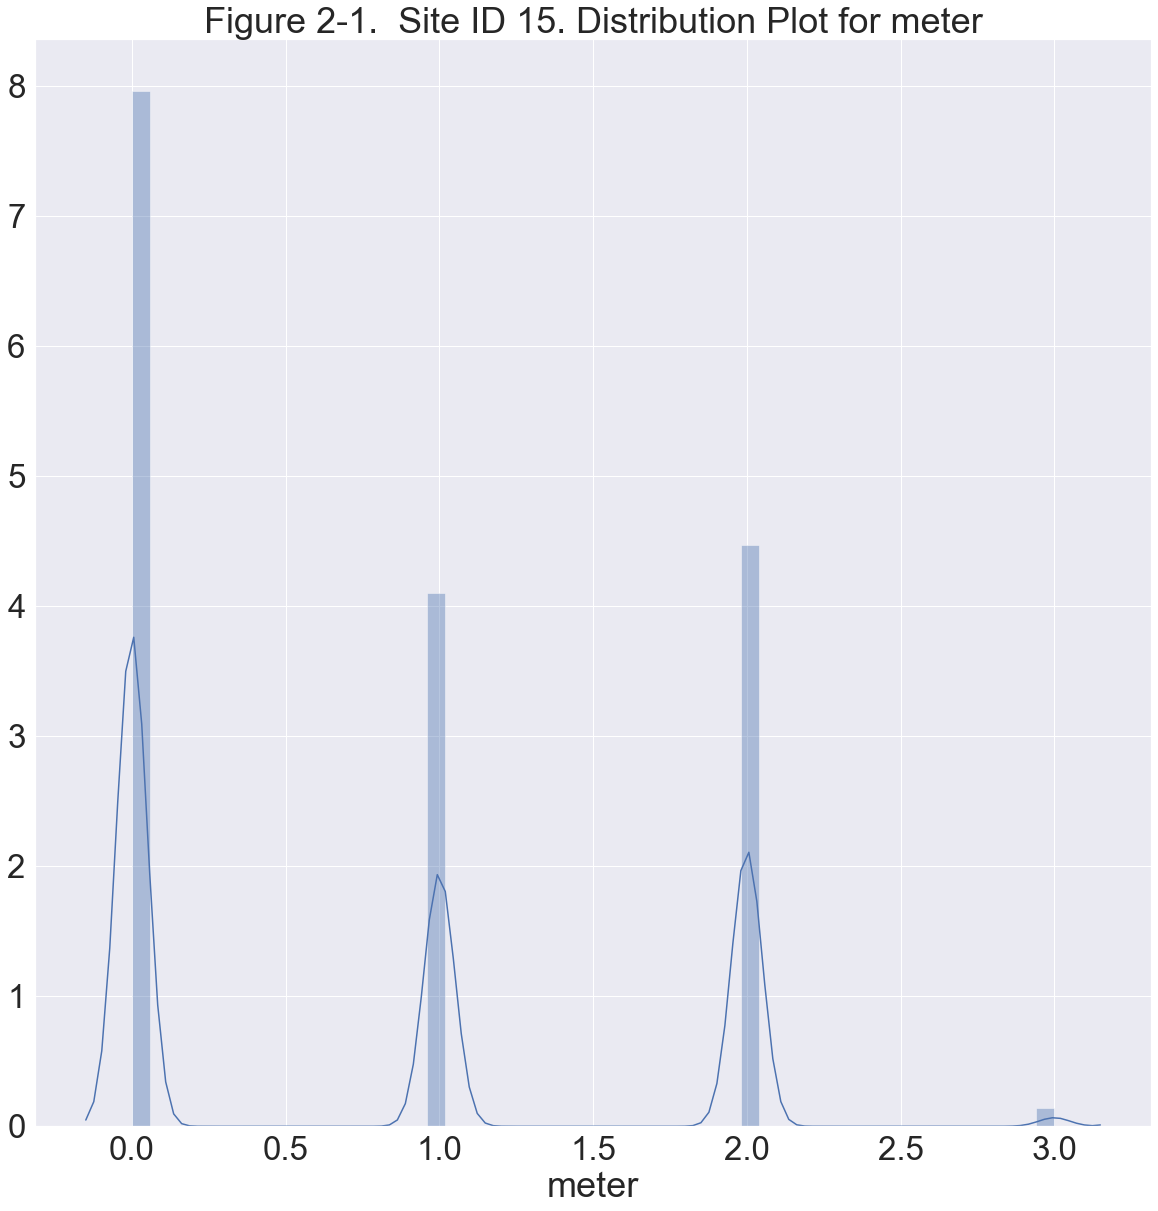

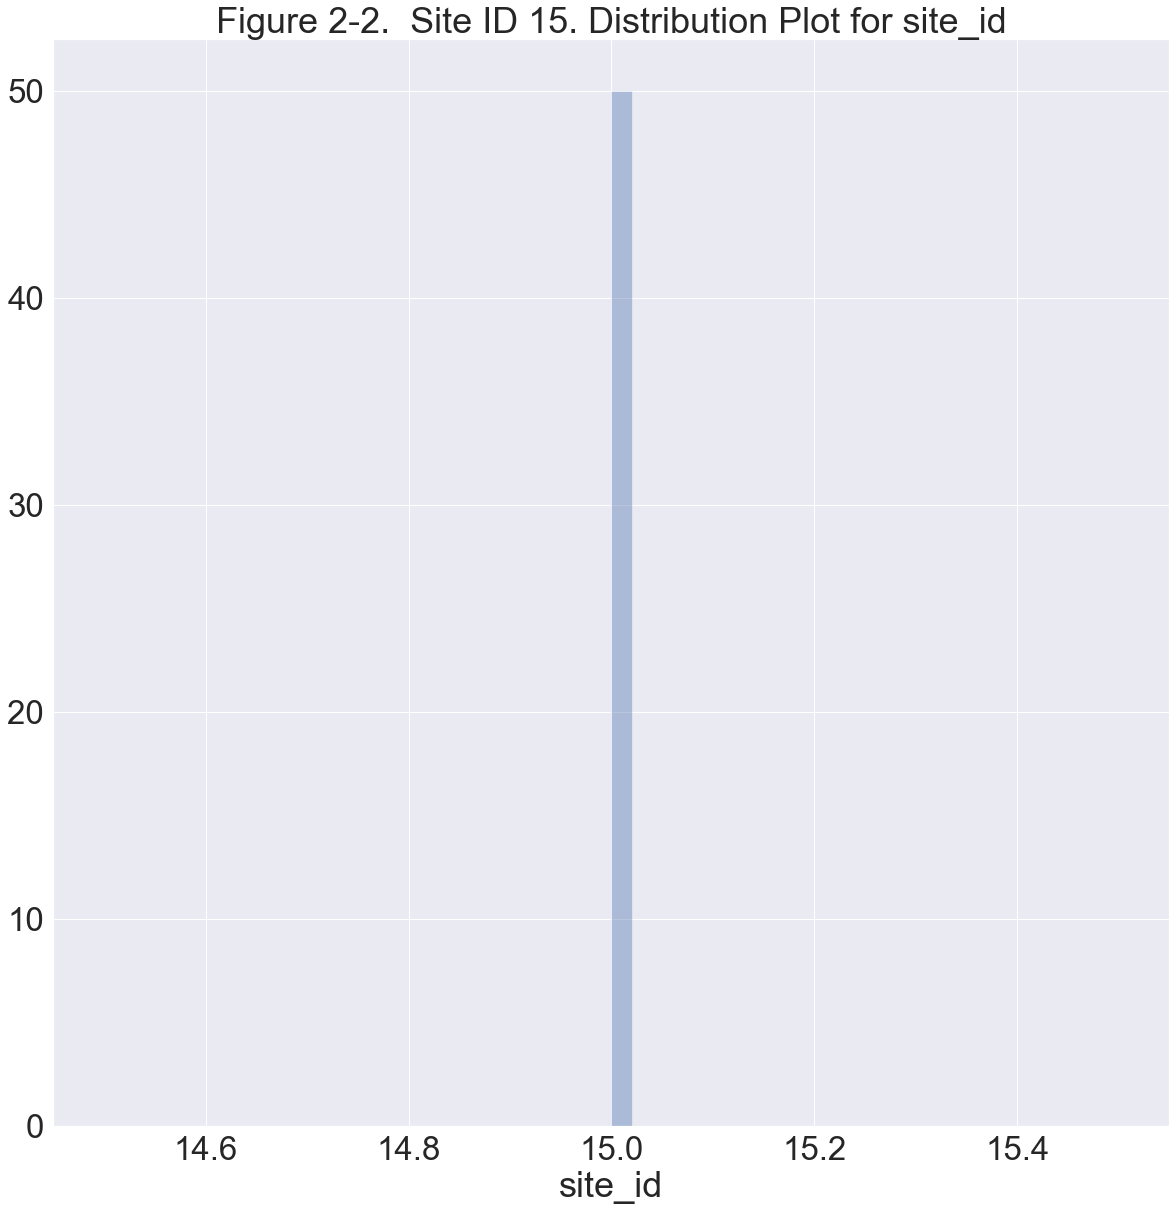

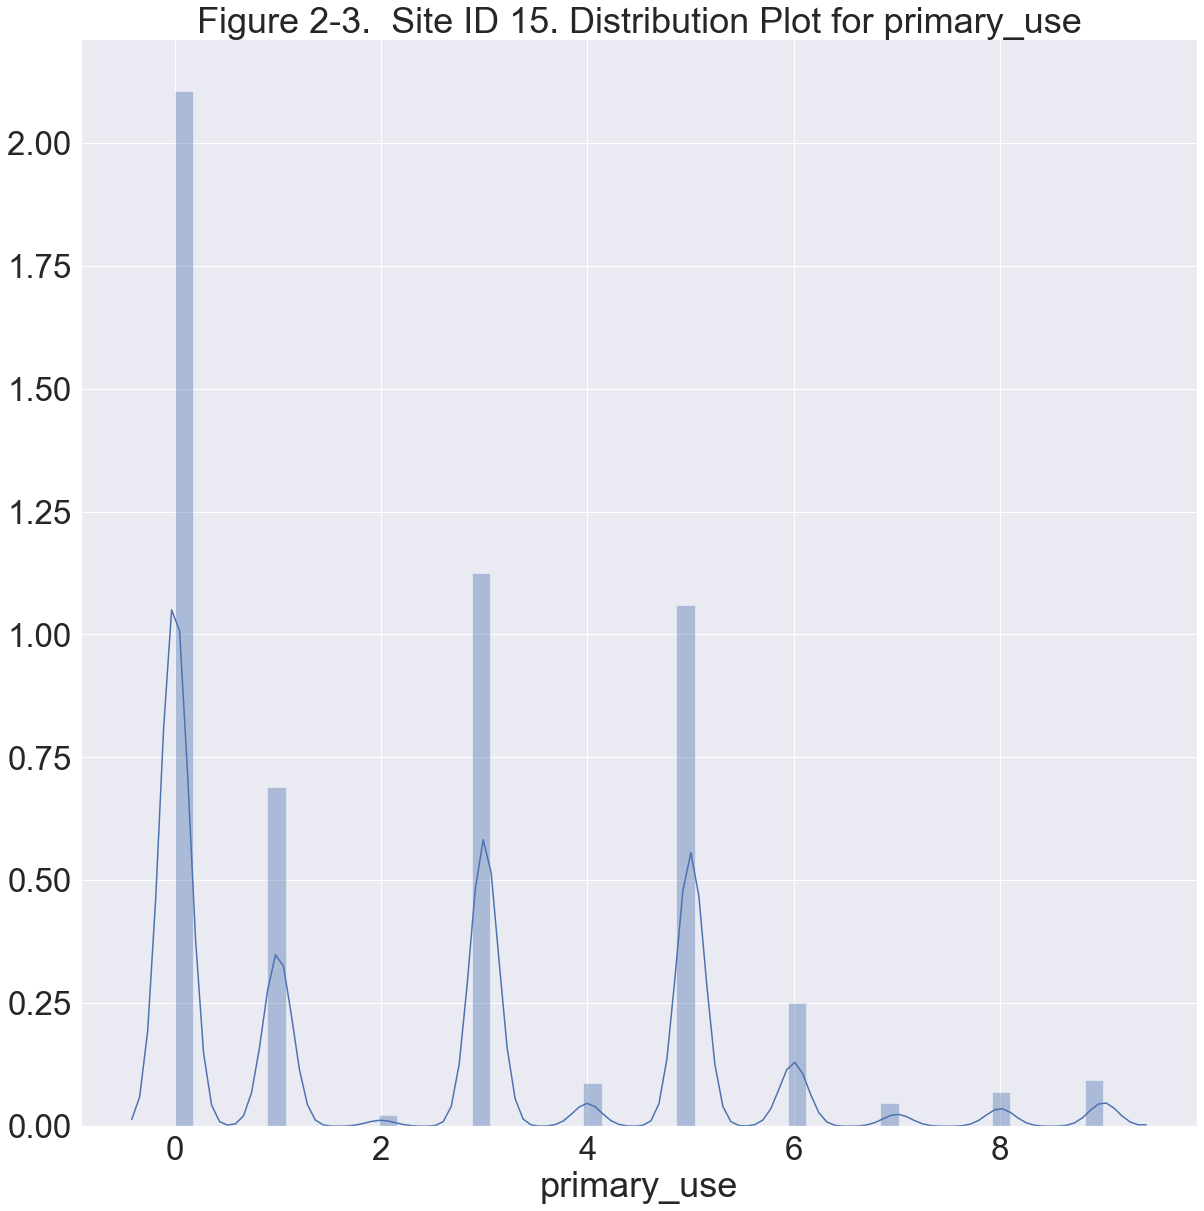

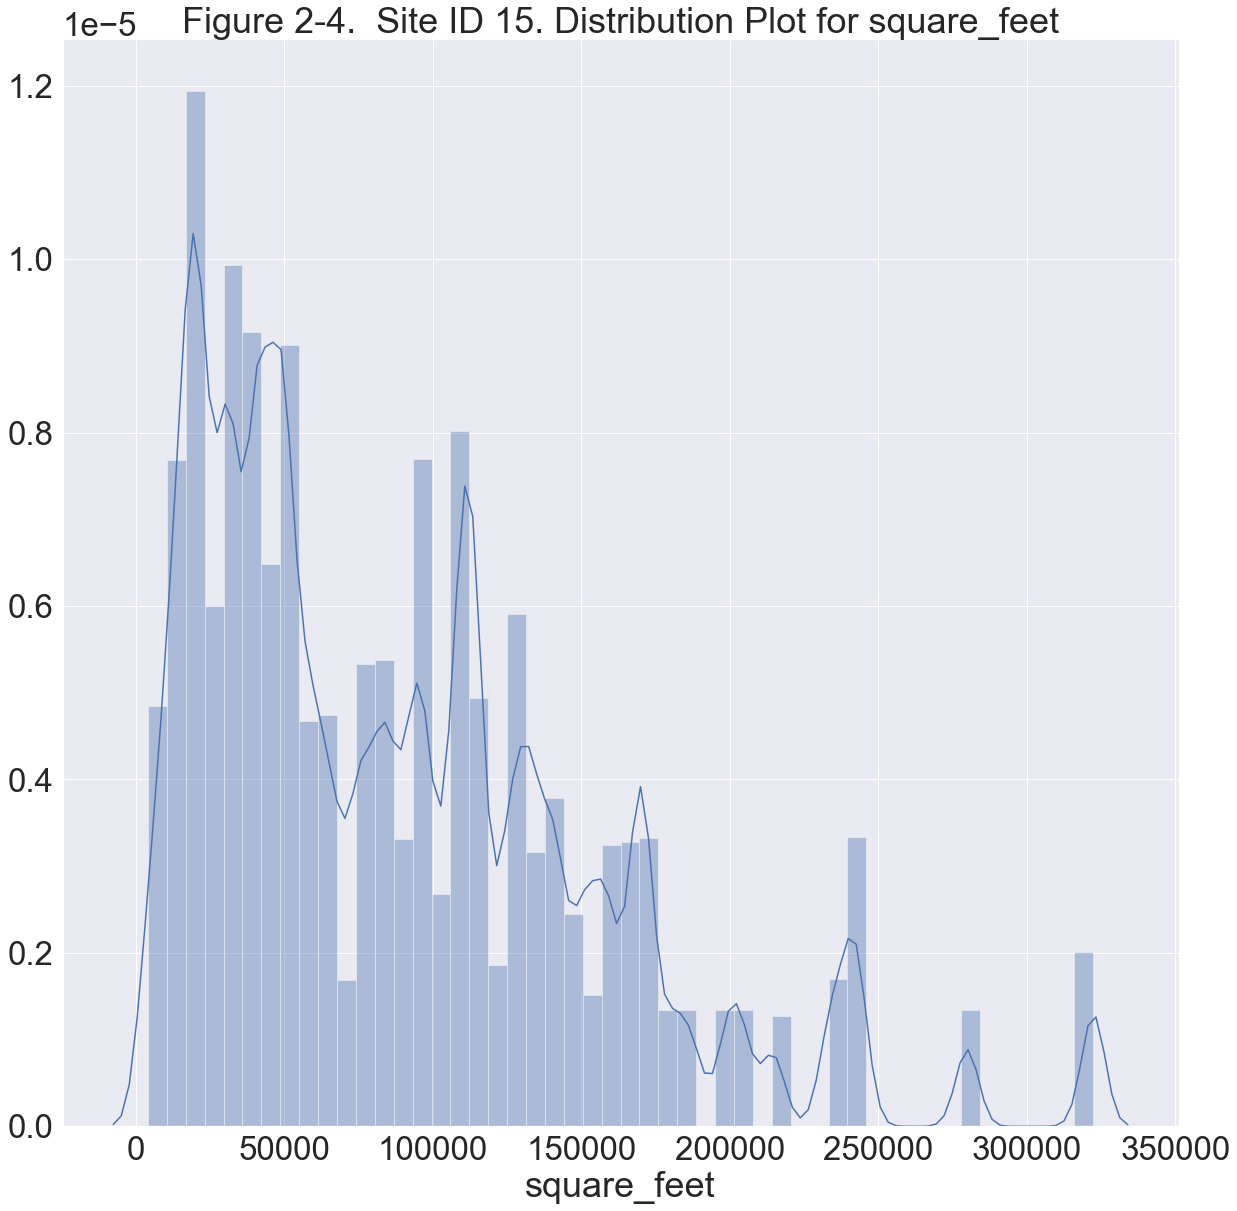

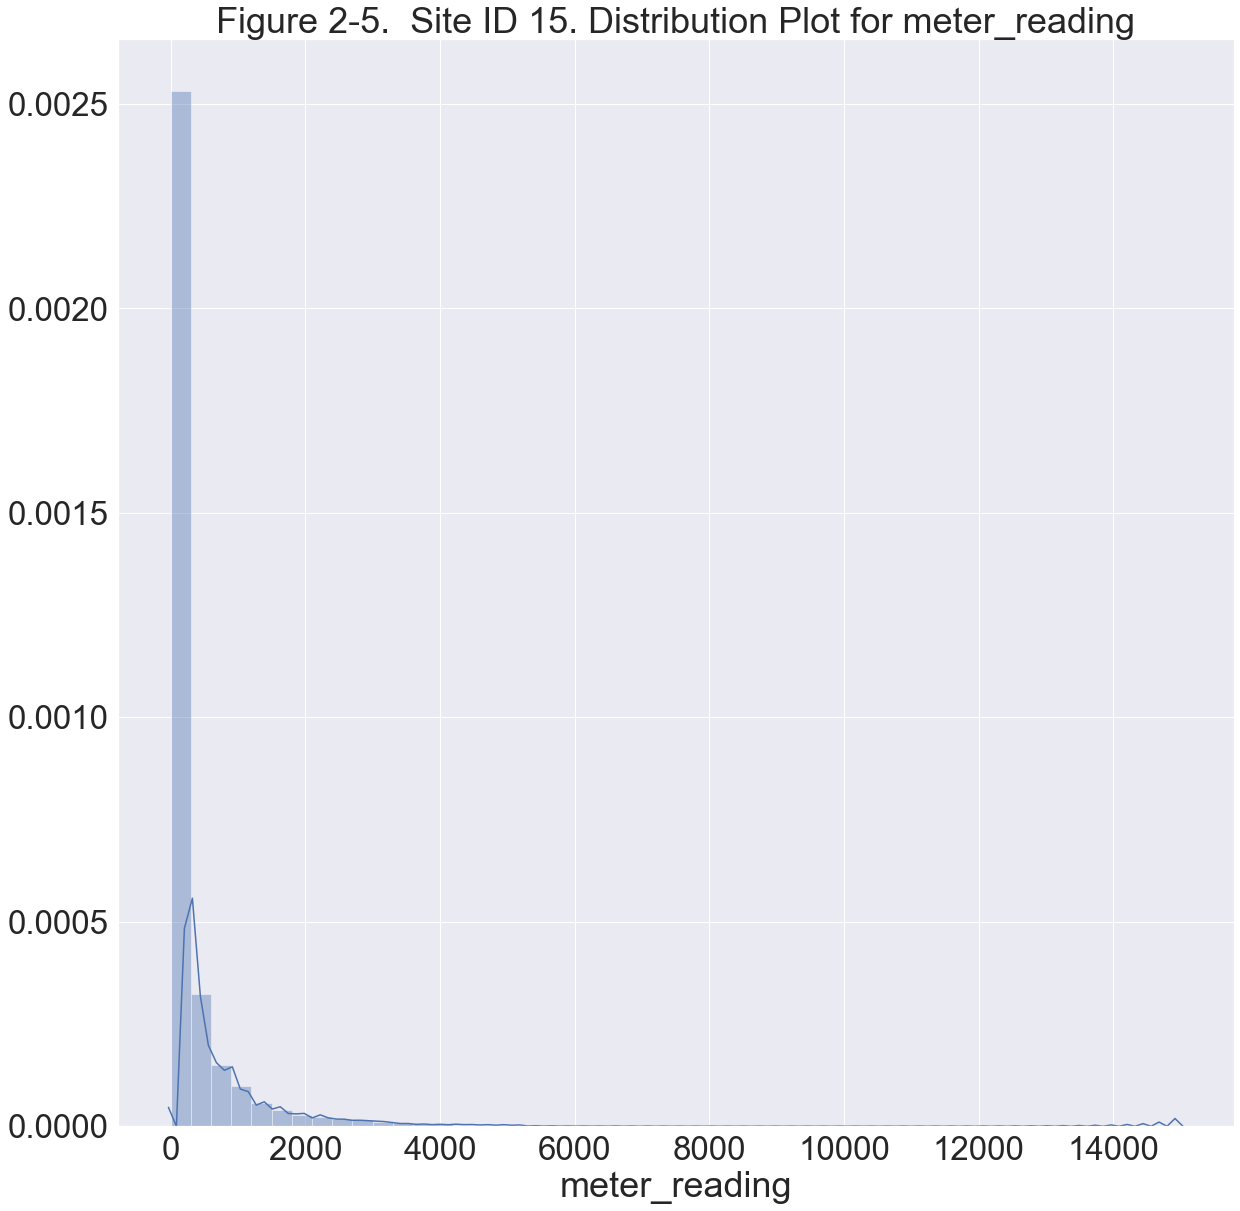

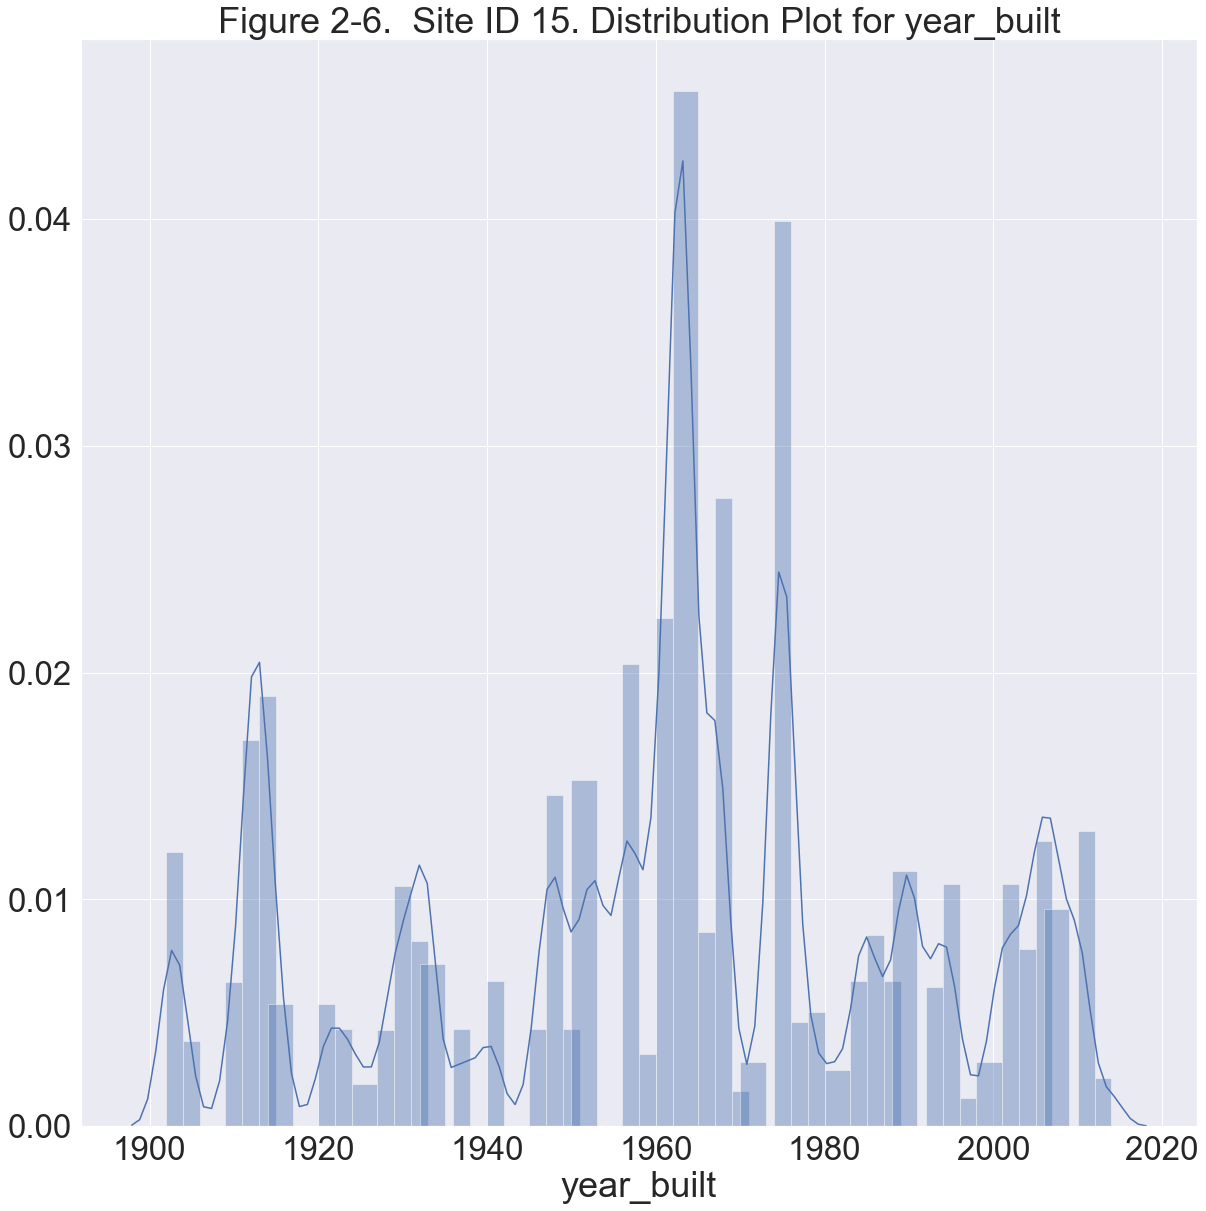

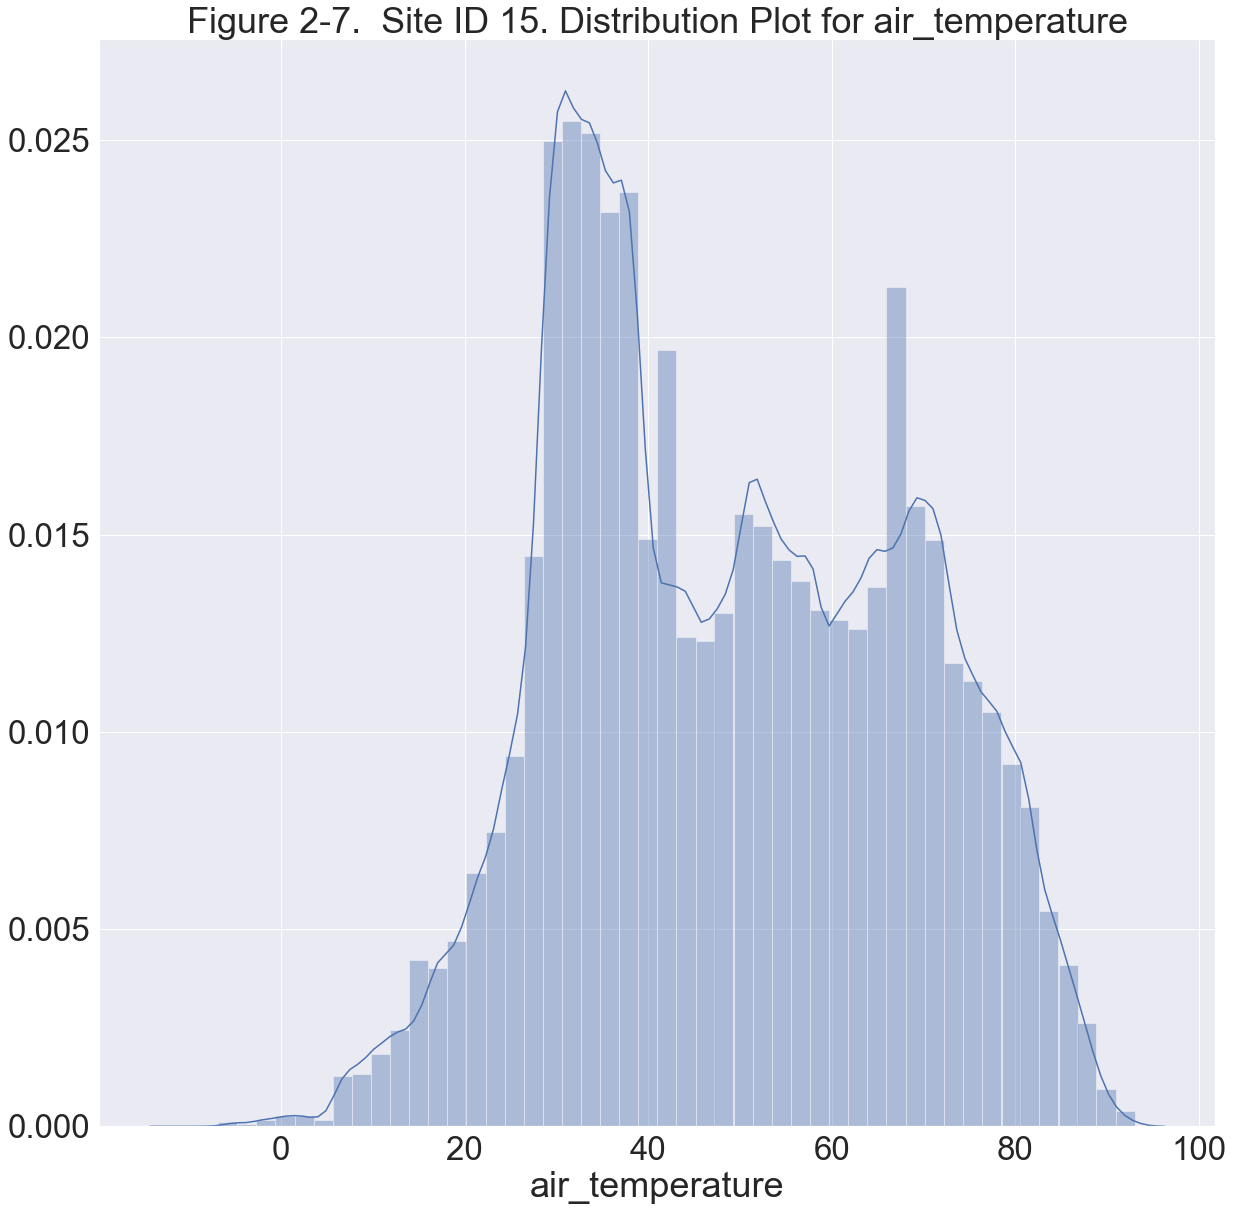

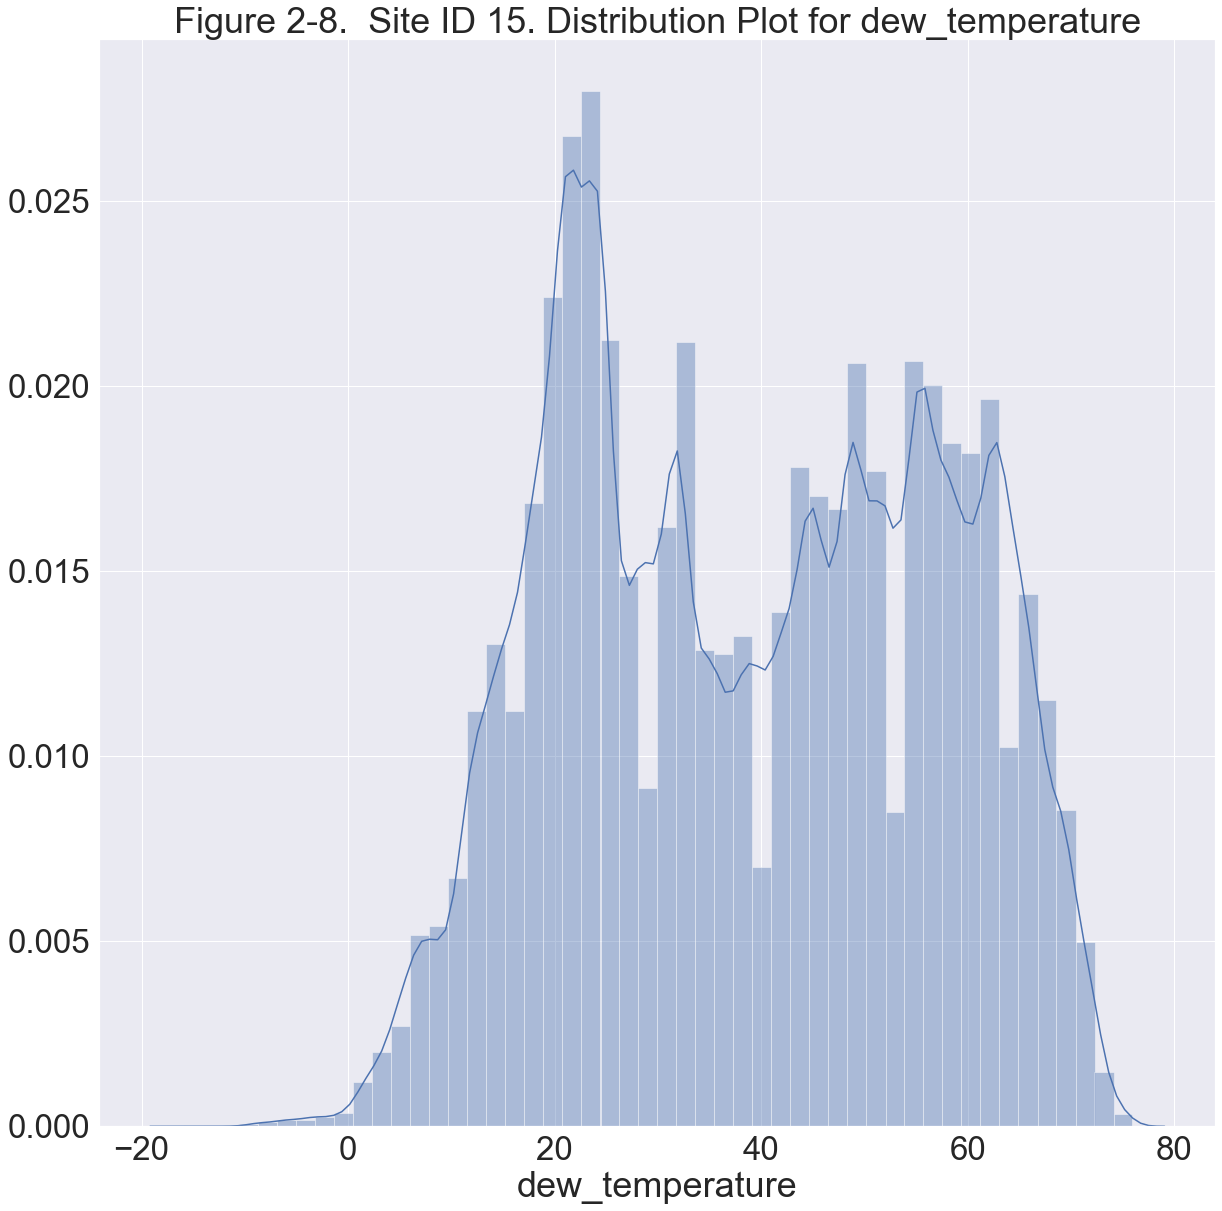

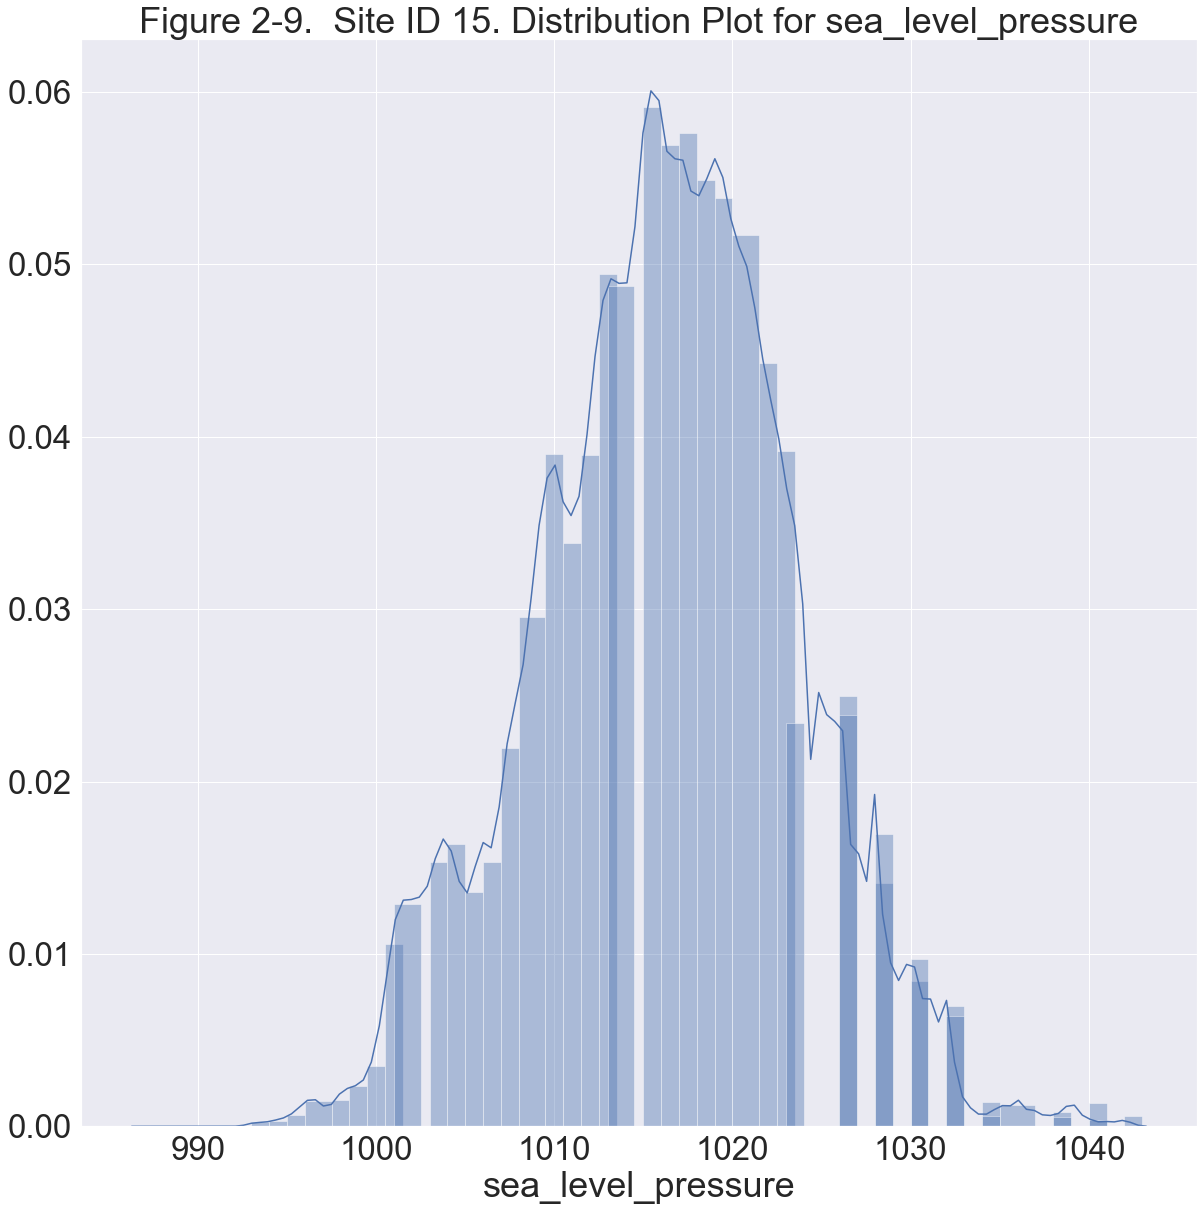

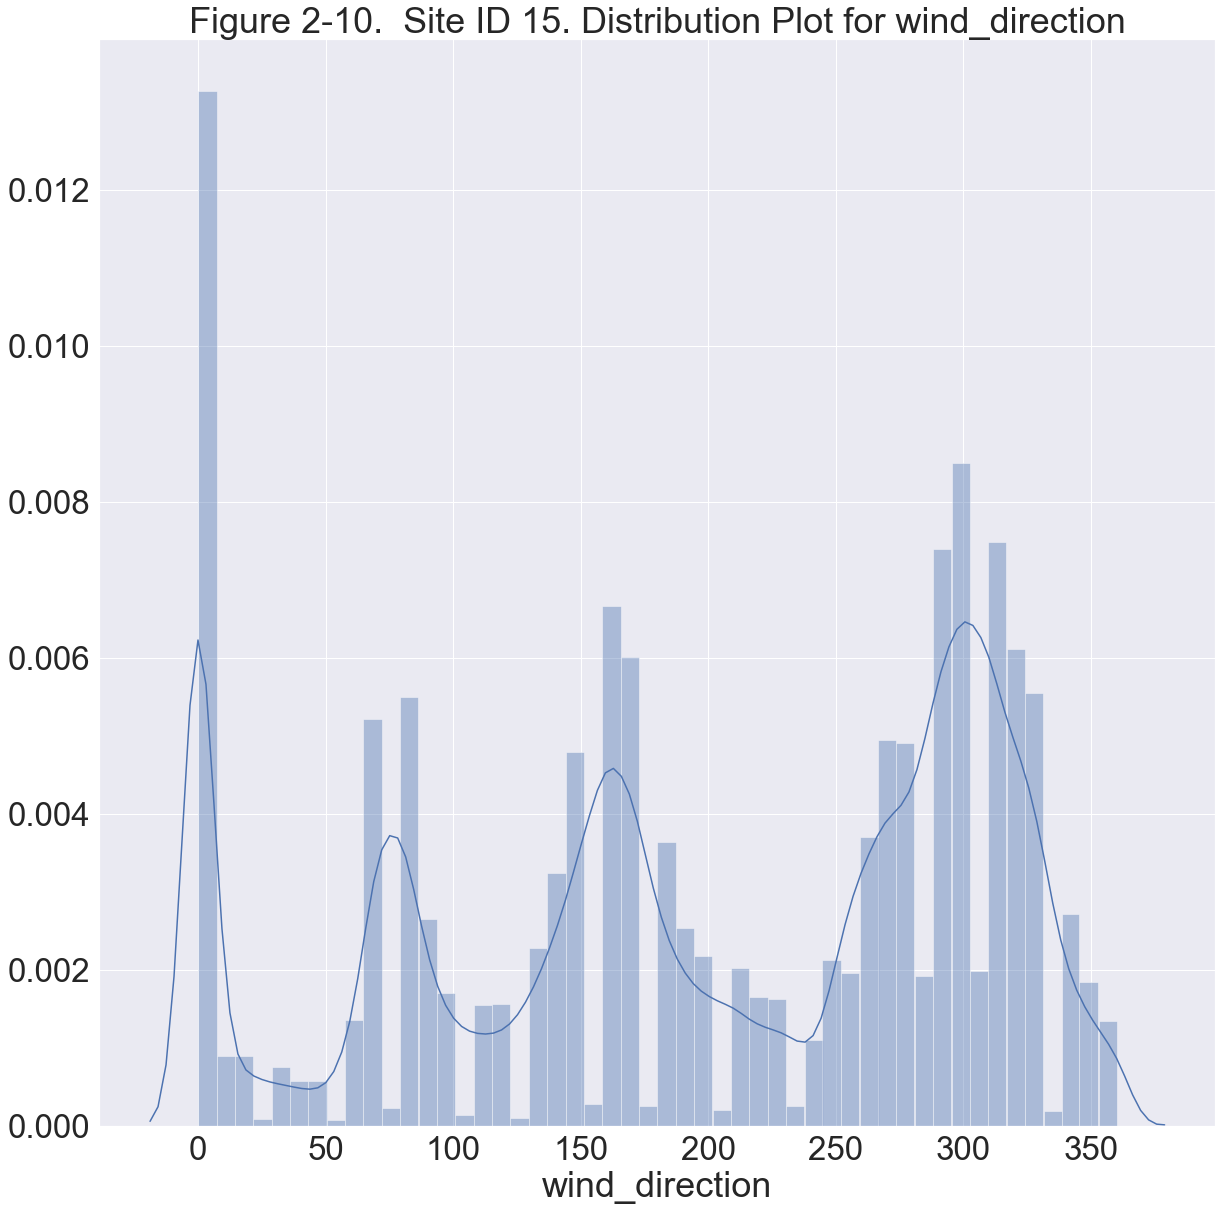

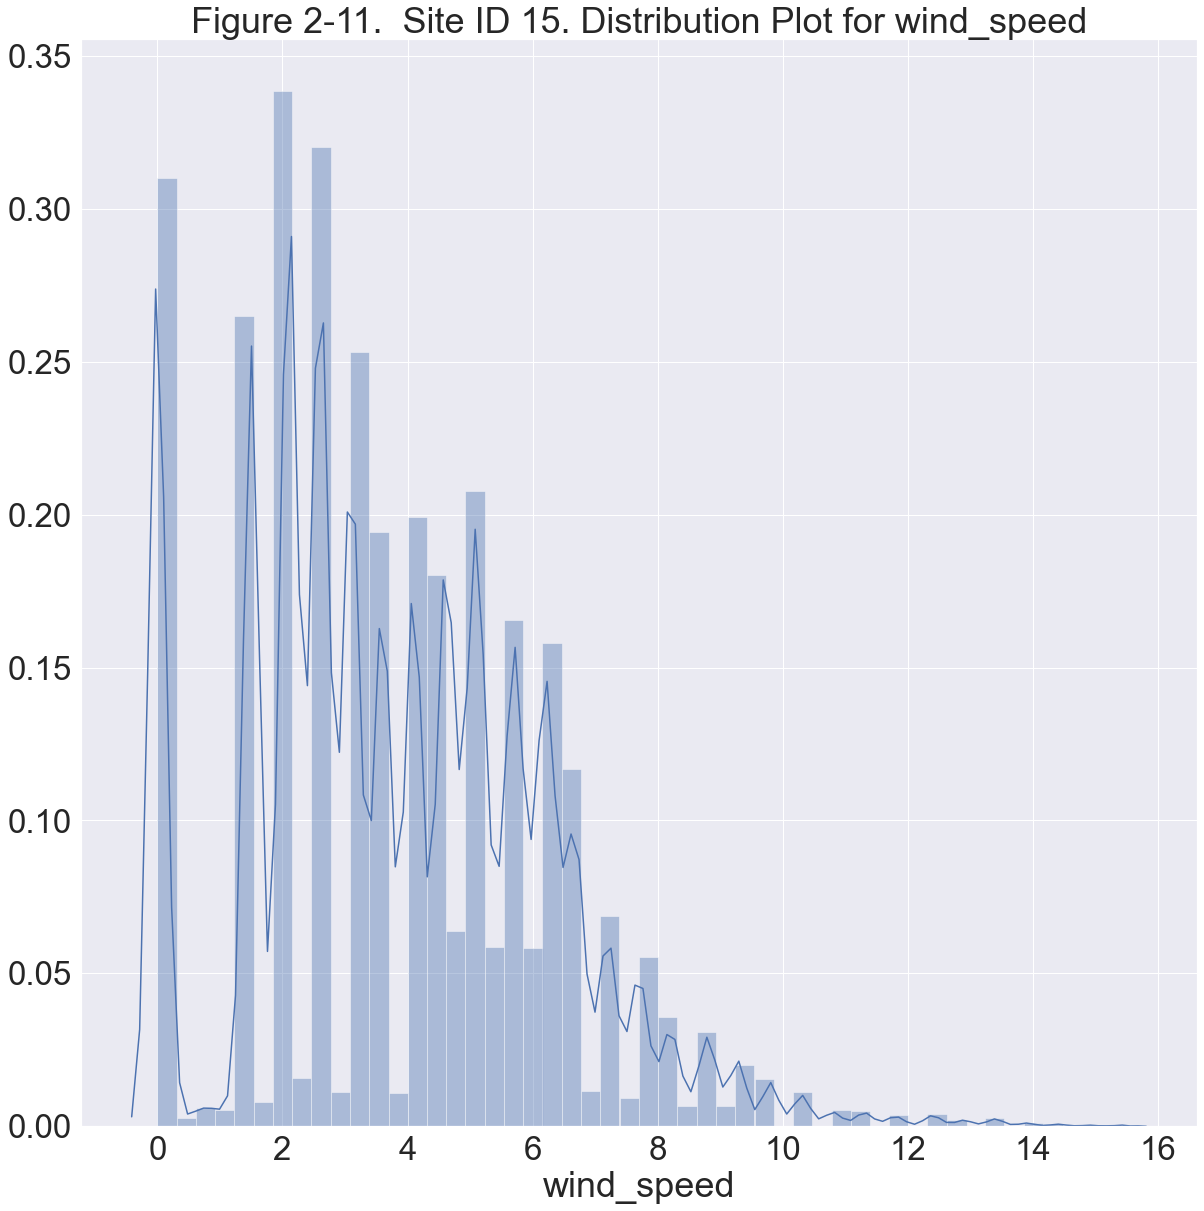

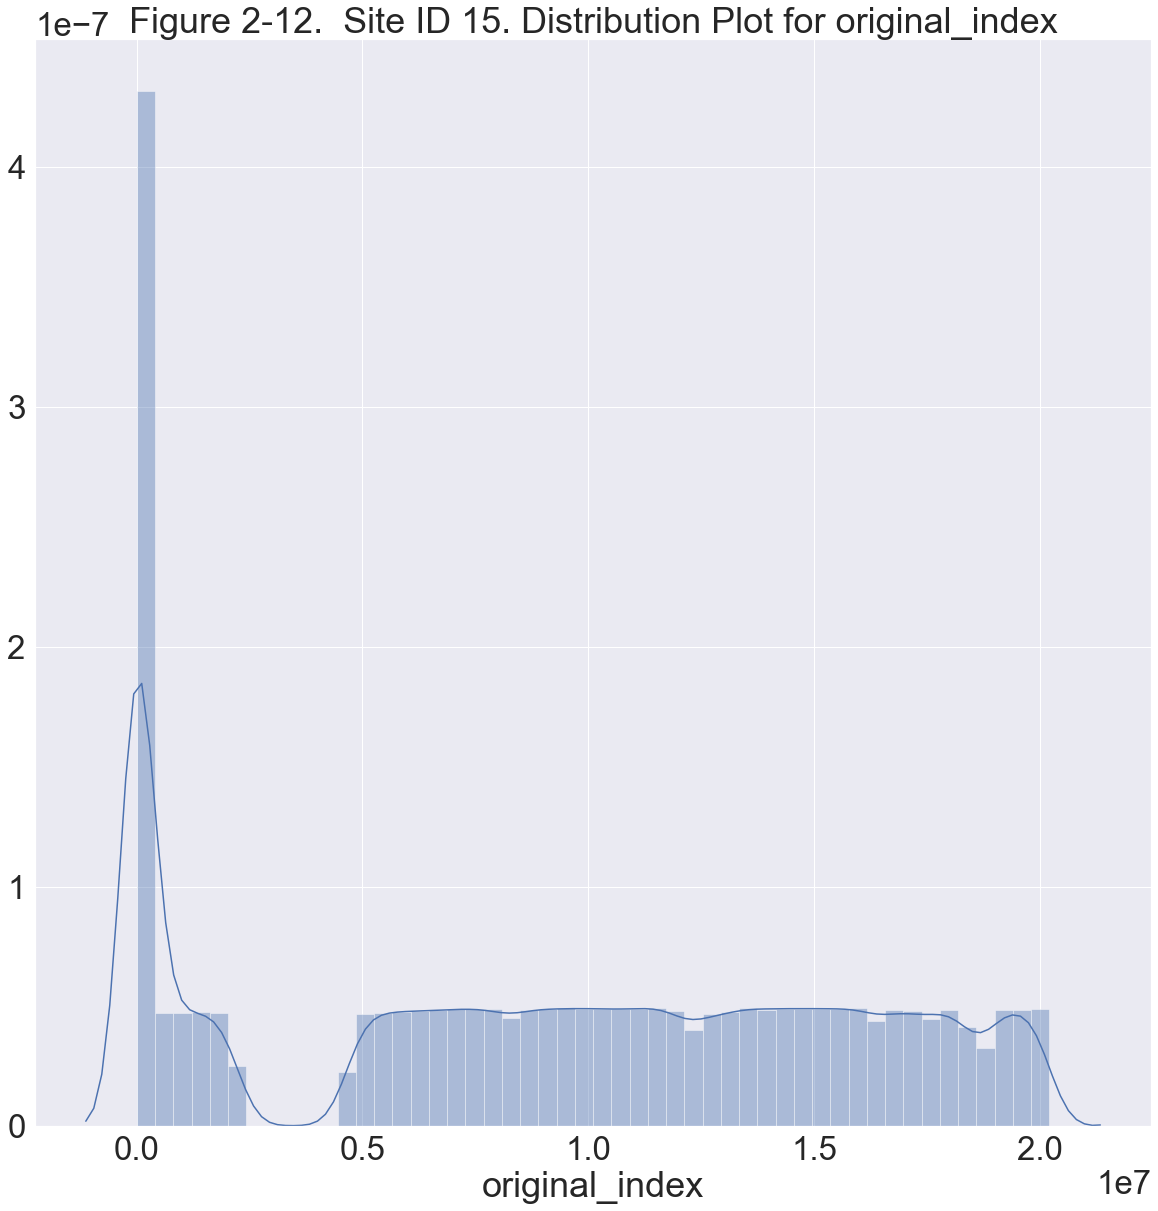

In [67]:
i=0
for name in list(data_train.drop(['timestamp'],axis=1)):
    sns.set(font_scale = 3)
    plt.subplots(figsize=(20, 20))
    sns.distplot(data_train[name])
    plt.title('Figure 2-{}.  Site ID {}. Distribution Plot for {}'.format(i,Split_Number_i,name))
    plot_fig = os.path.join(figures_path[Split_Number_i],'Figure 2-{}.  Site ID {}. After Distribution Plot {}.png'.format(i,Split_Number_i,name))
    plt.savefig(plot_fig,dpi=100,bbox_inches='tight')
    plt.show()
    i =i+ 1

### sns.boxplot()

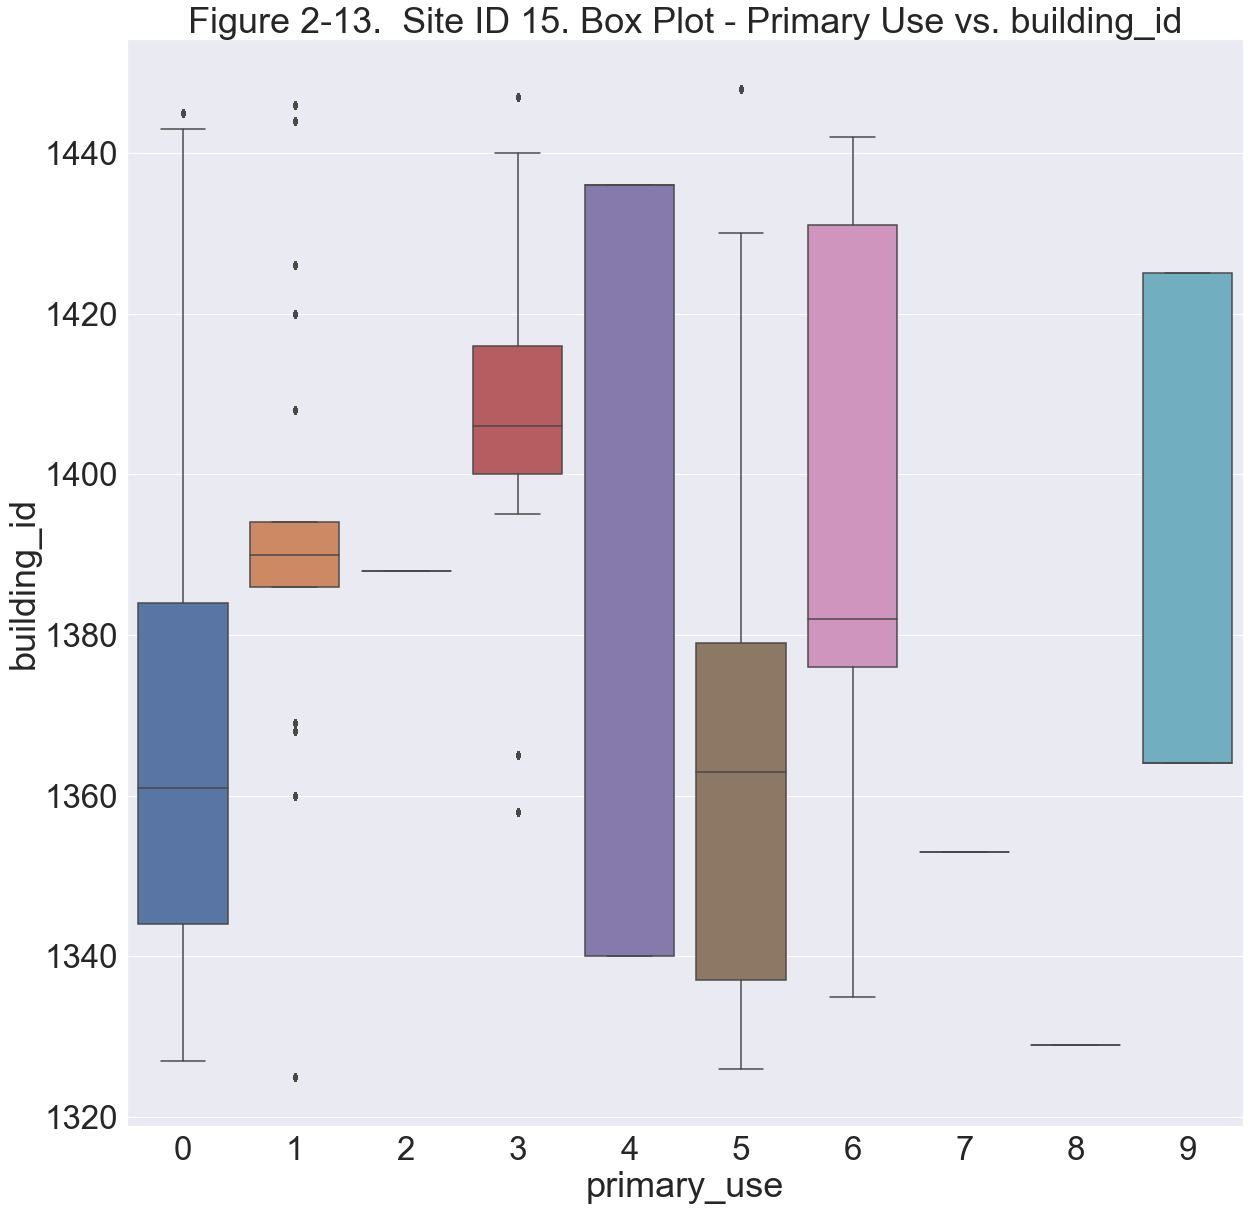

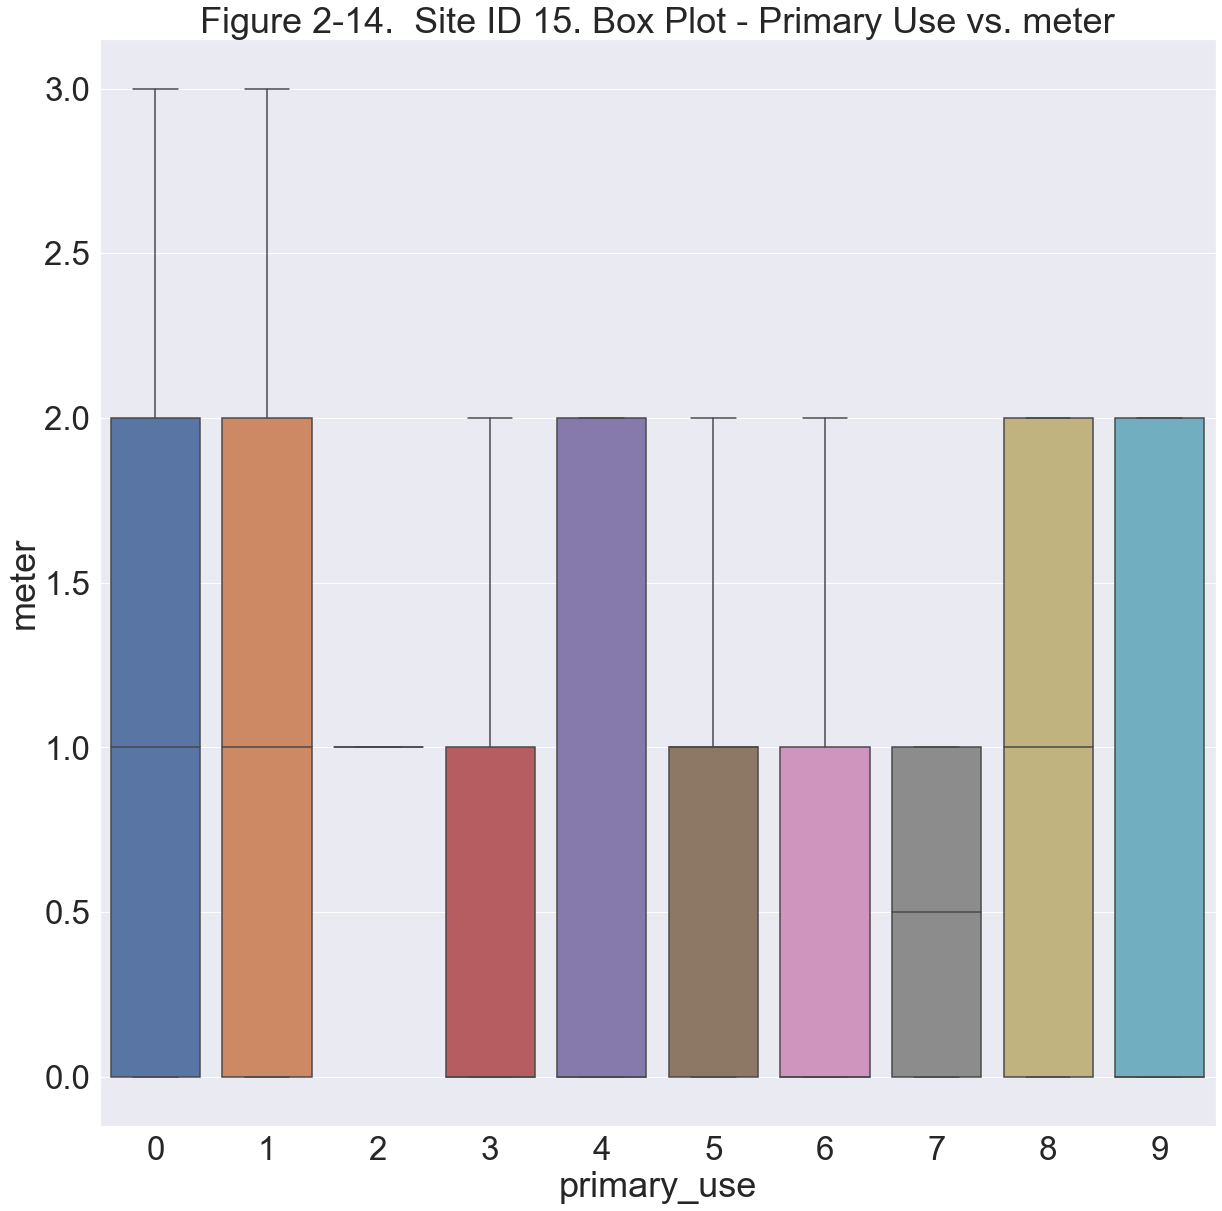

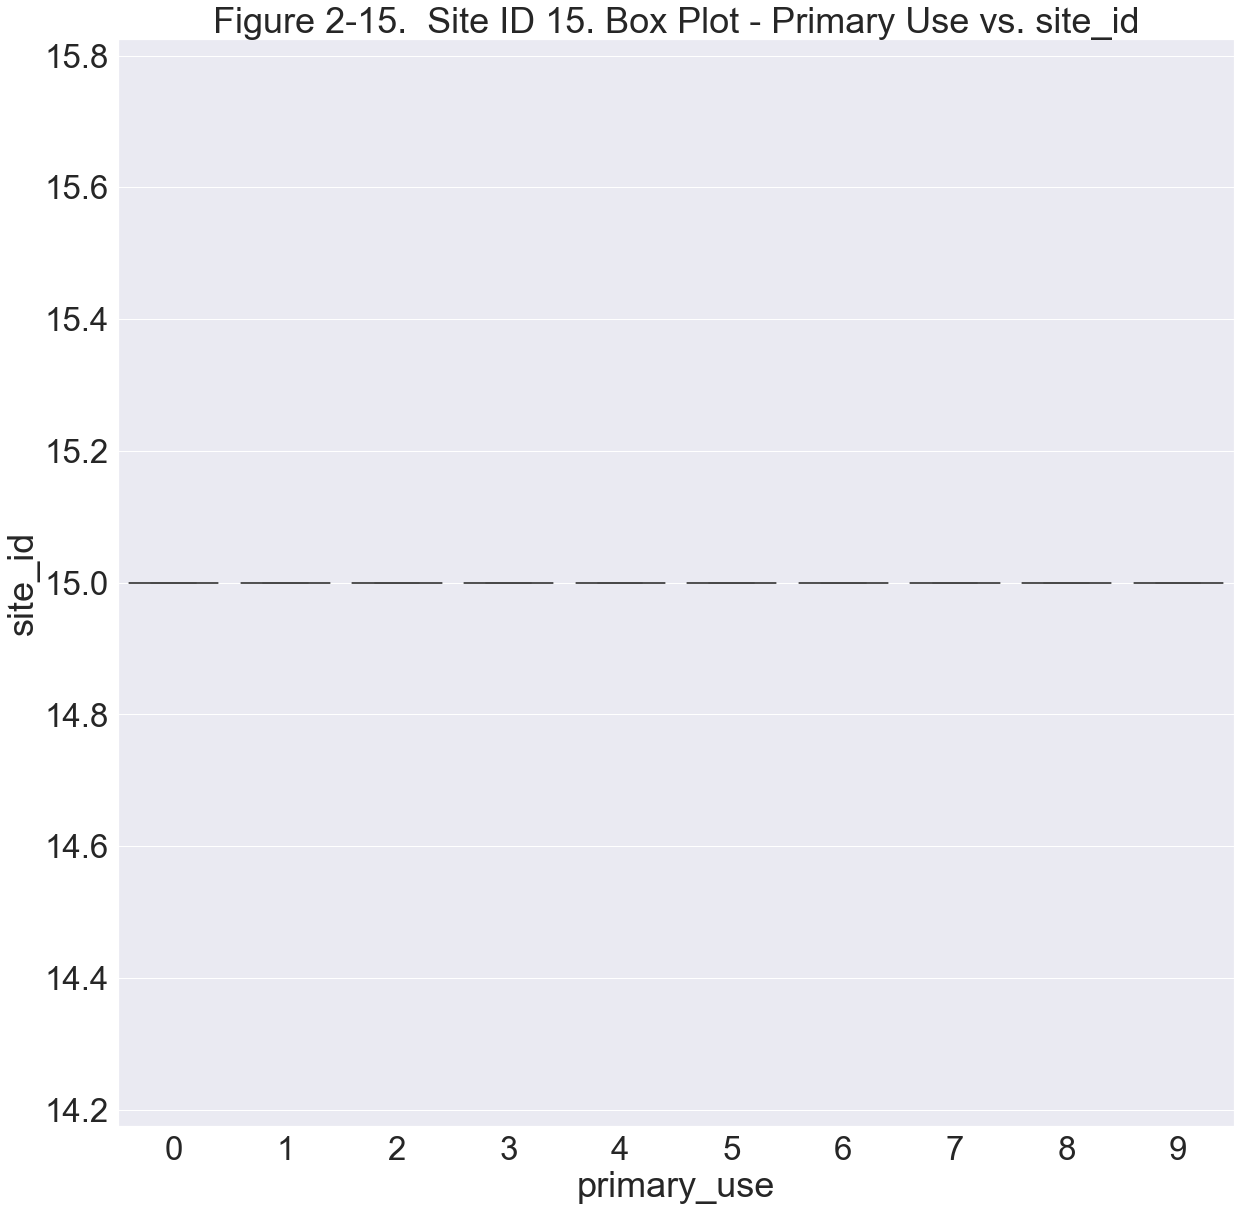

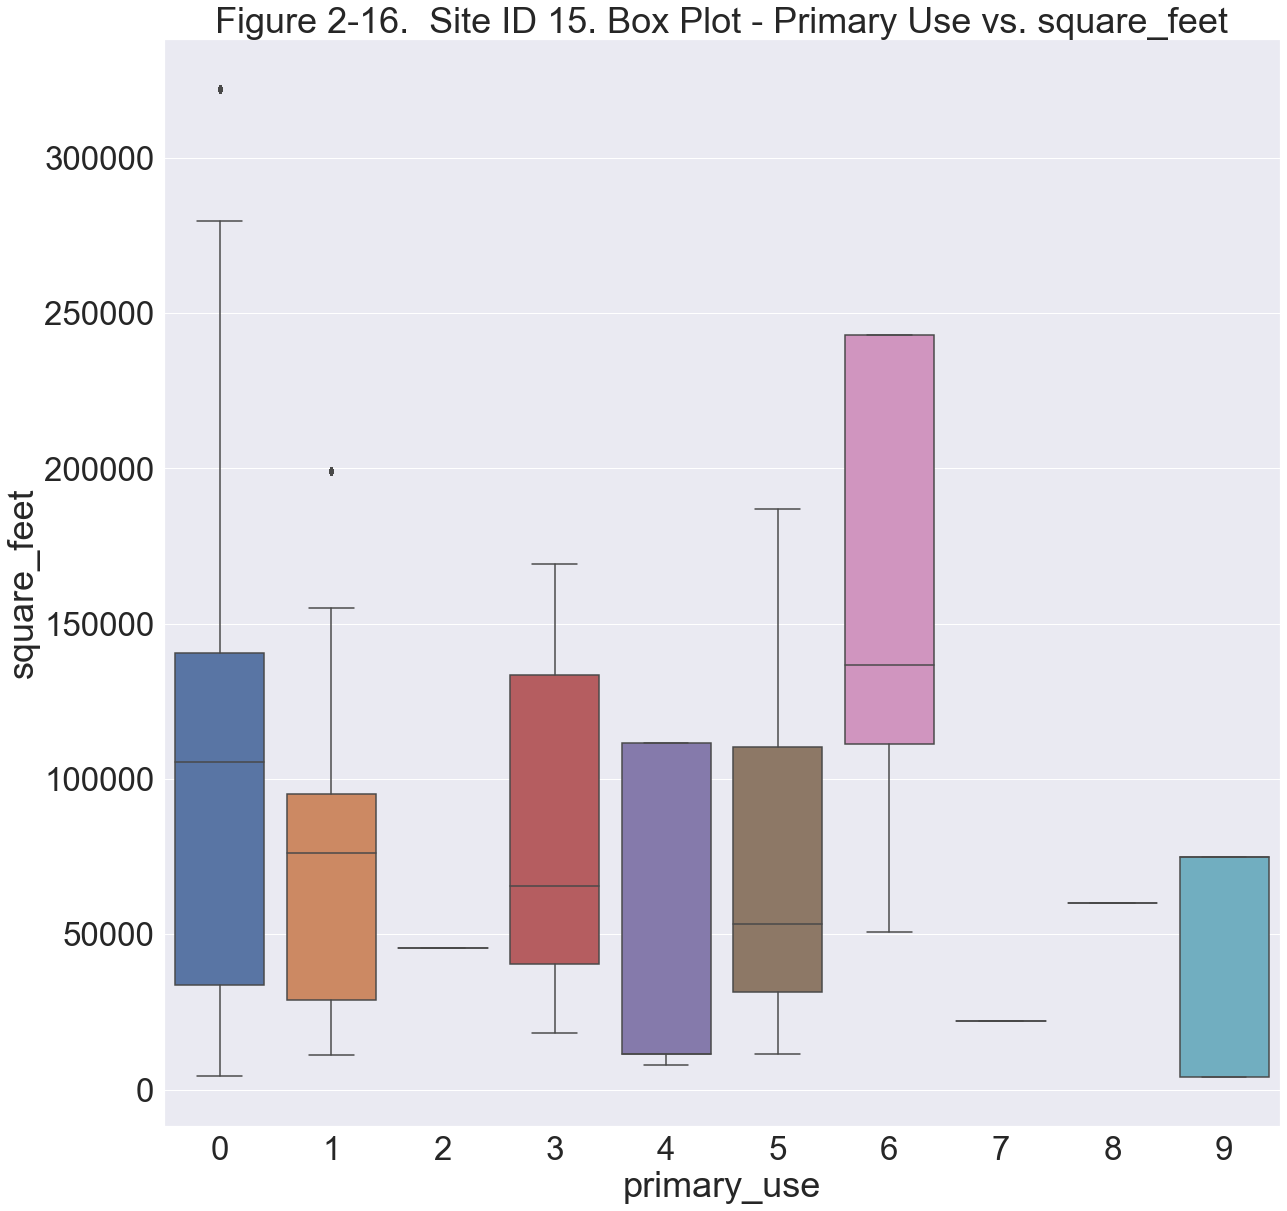

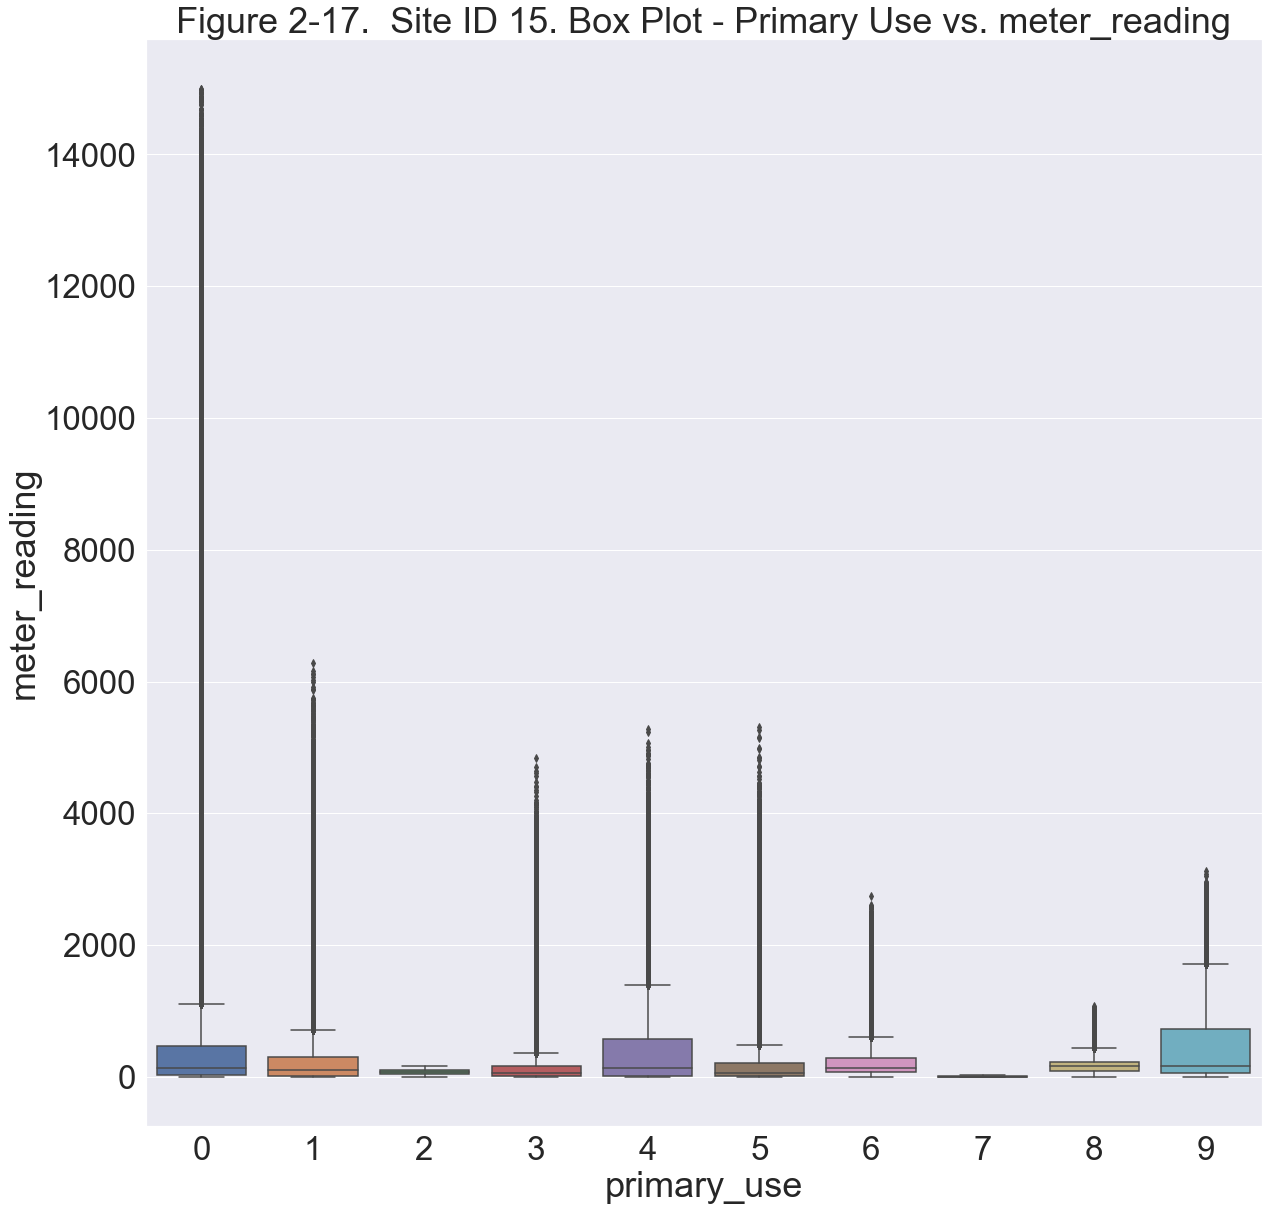

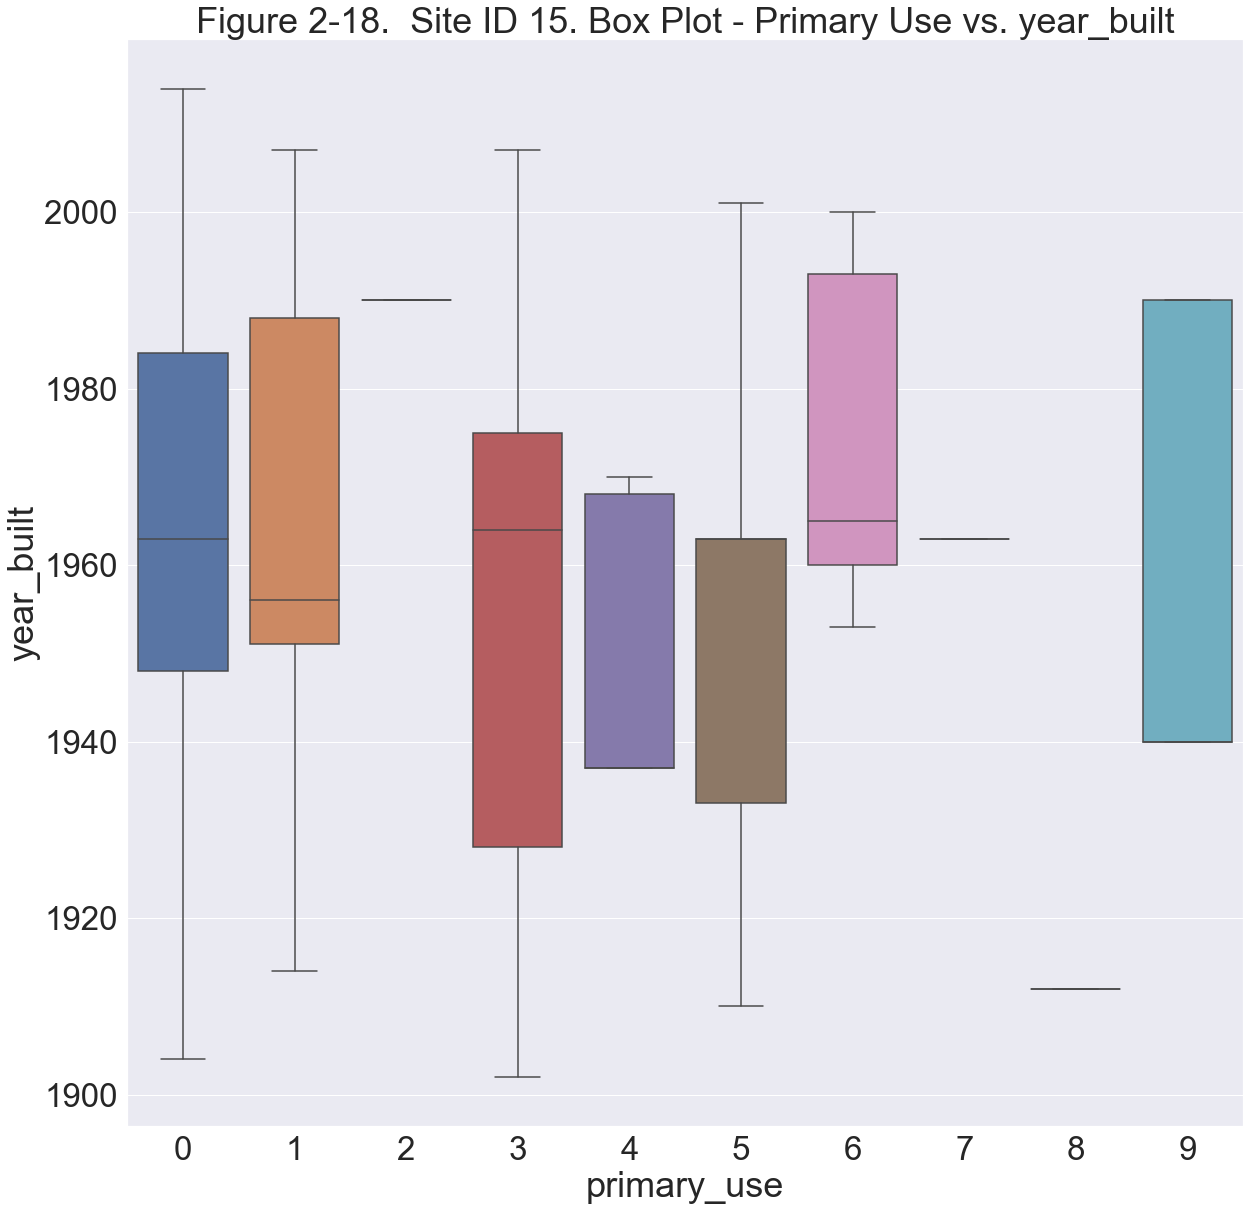

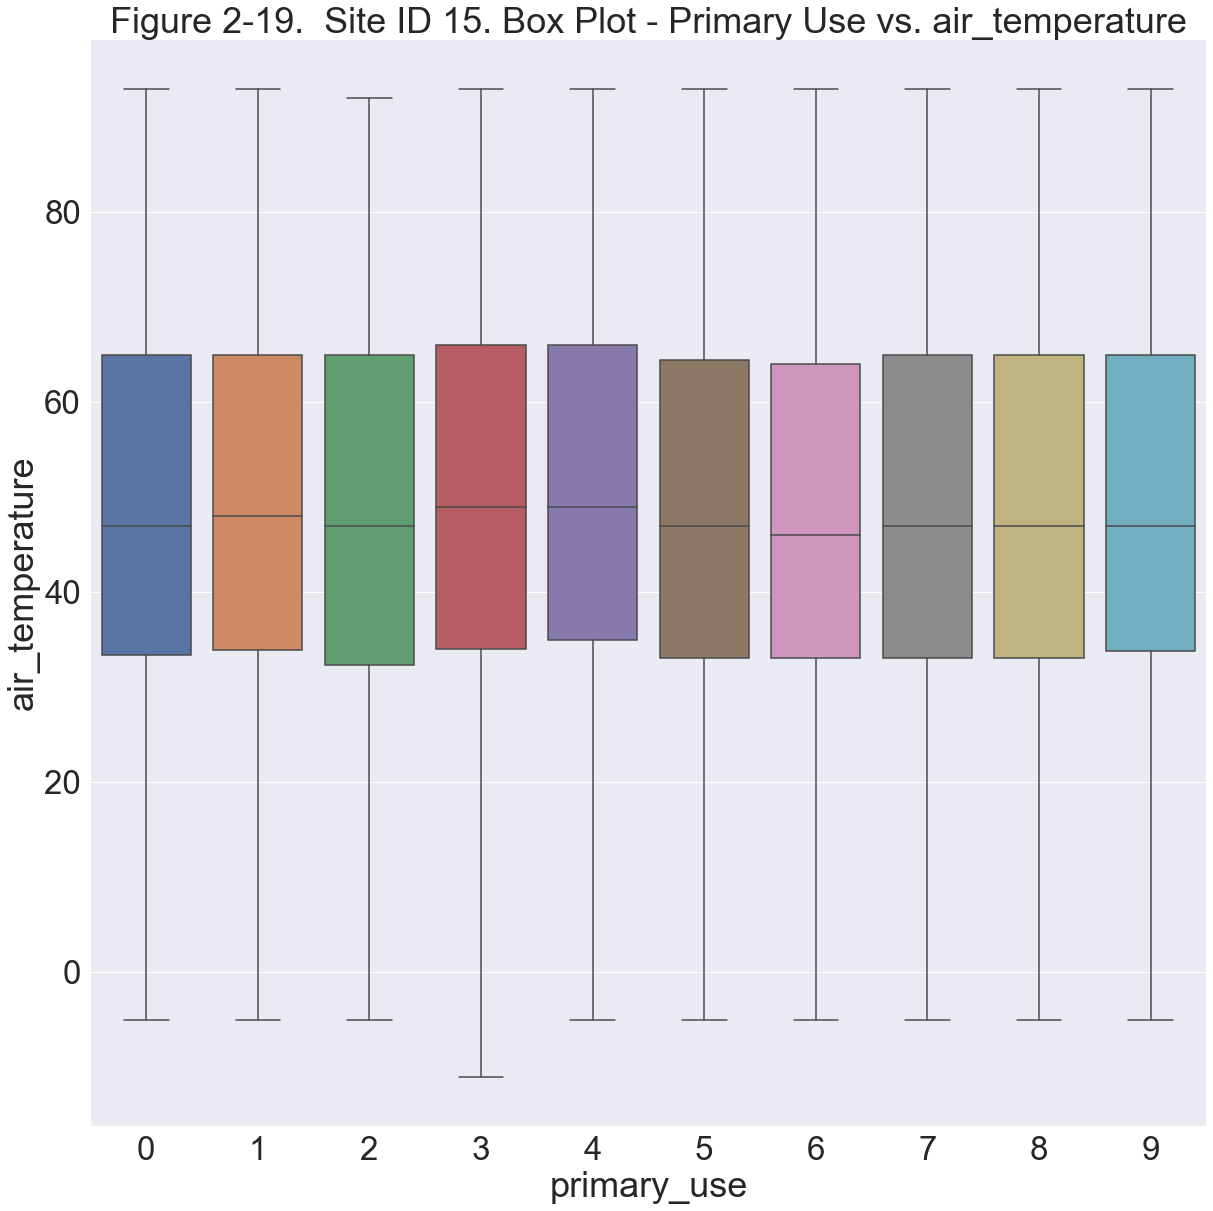

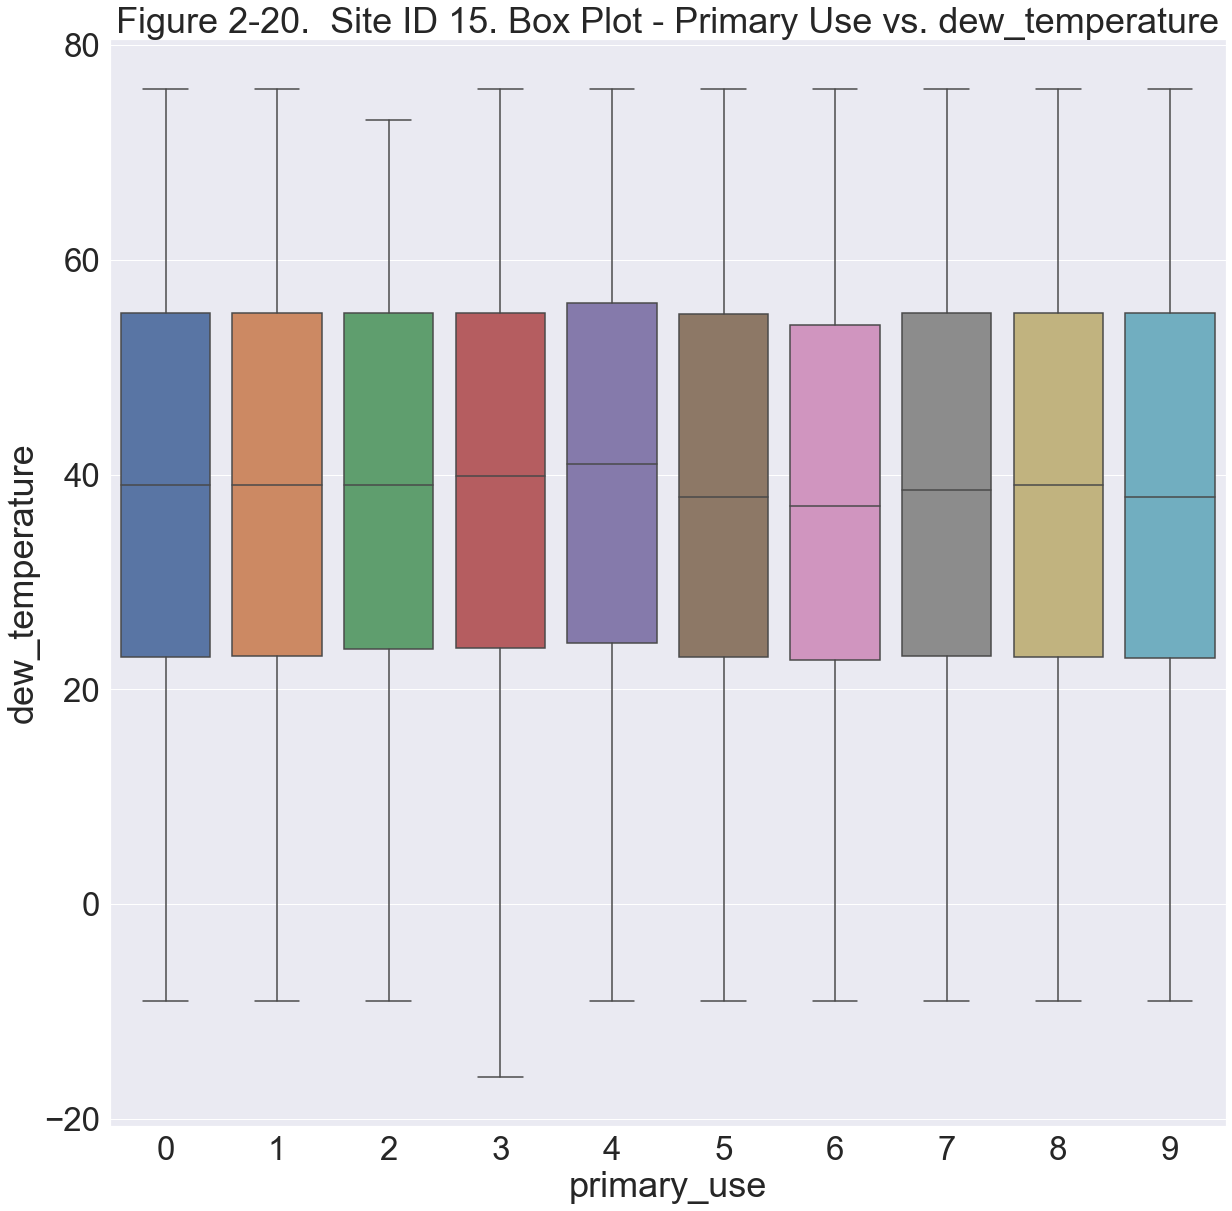

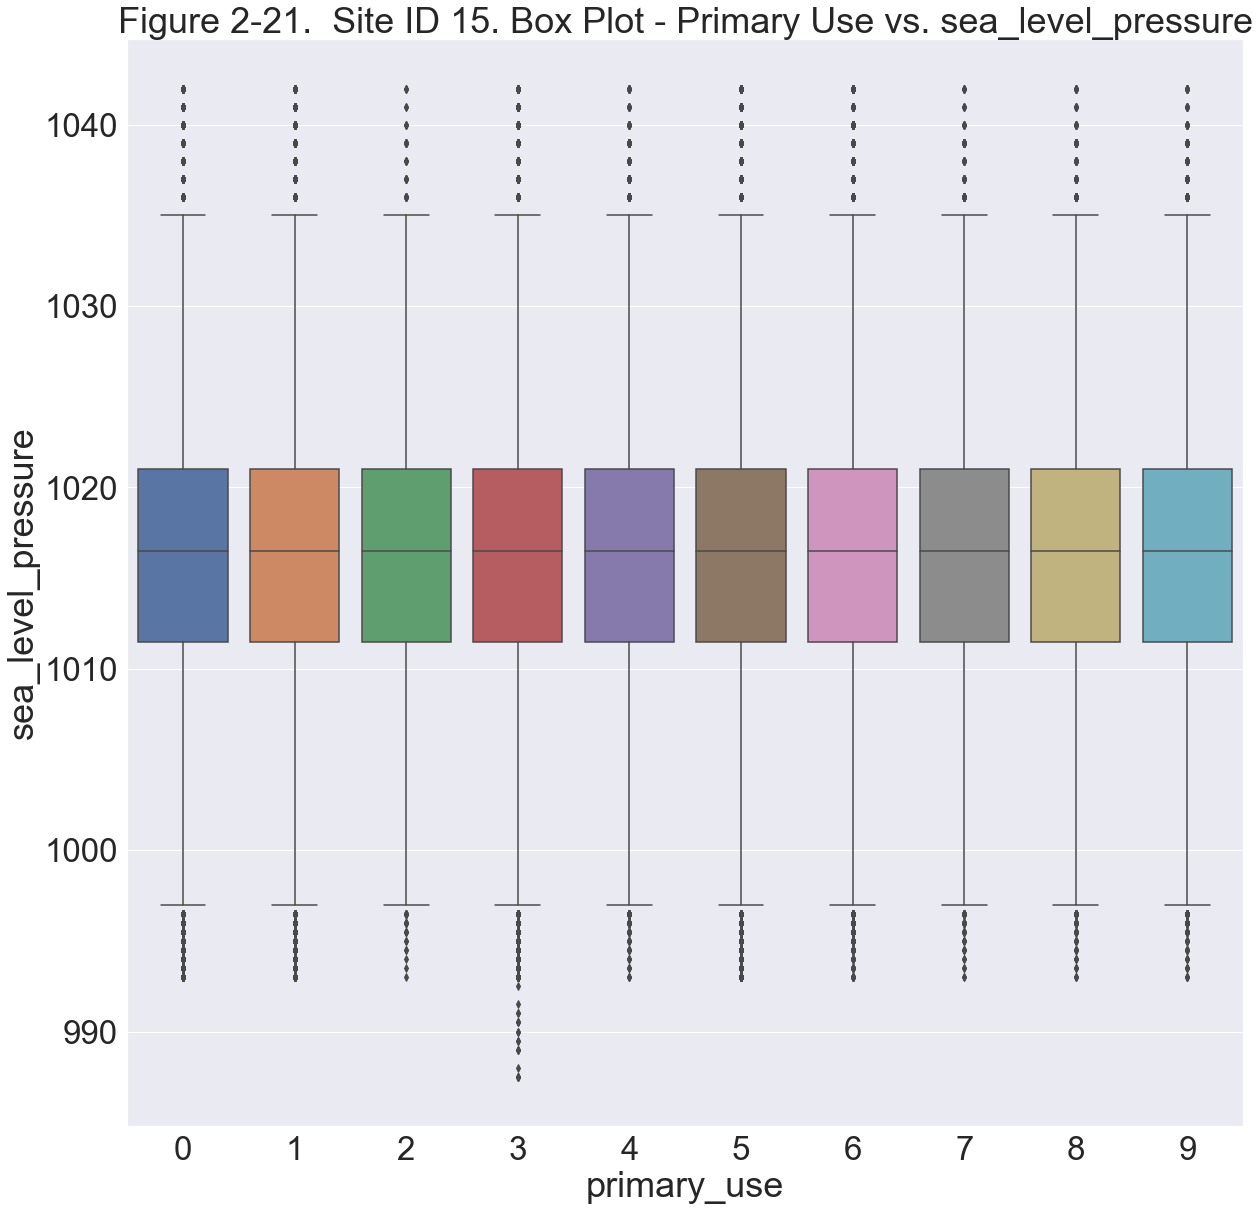

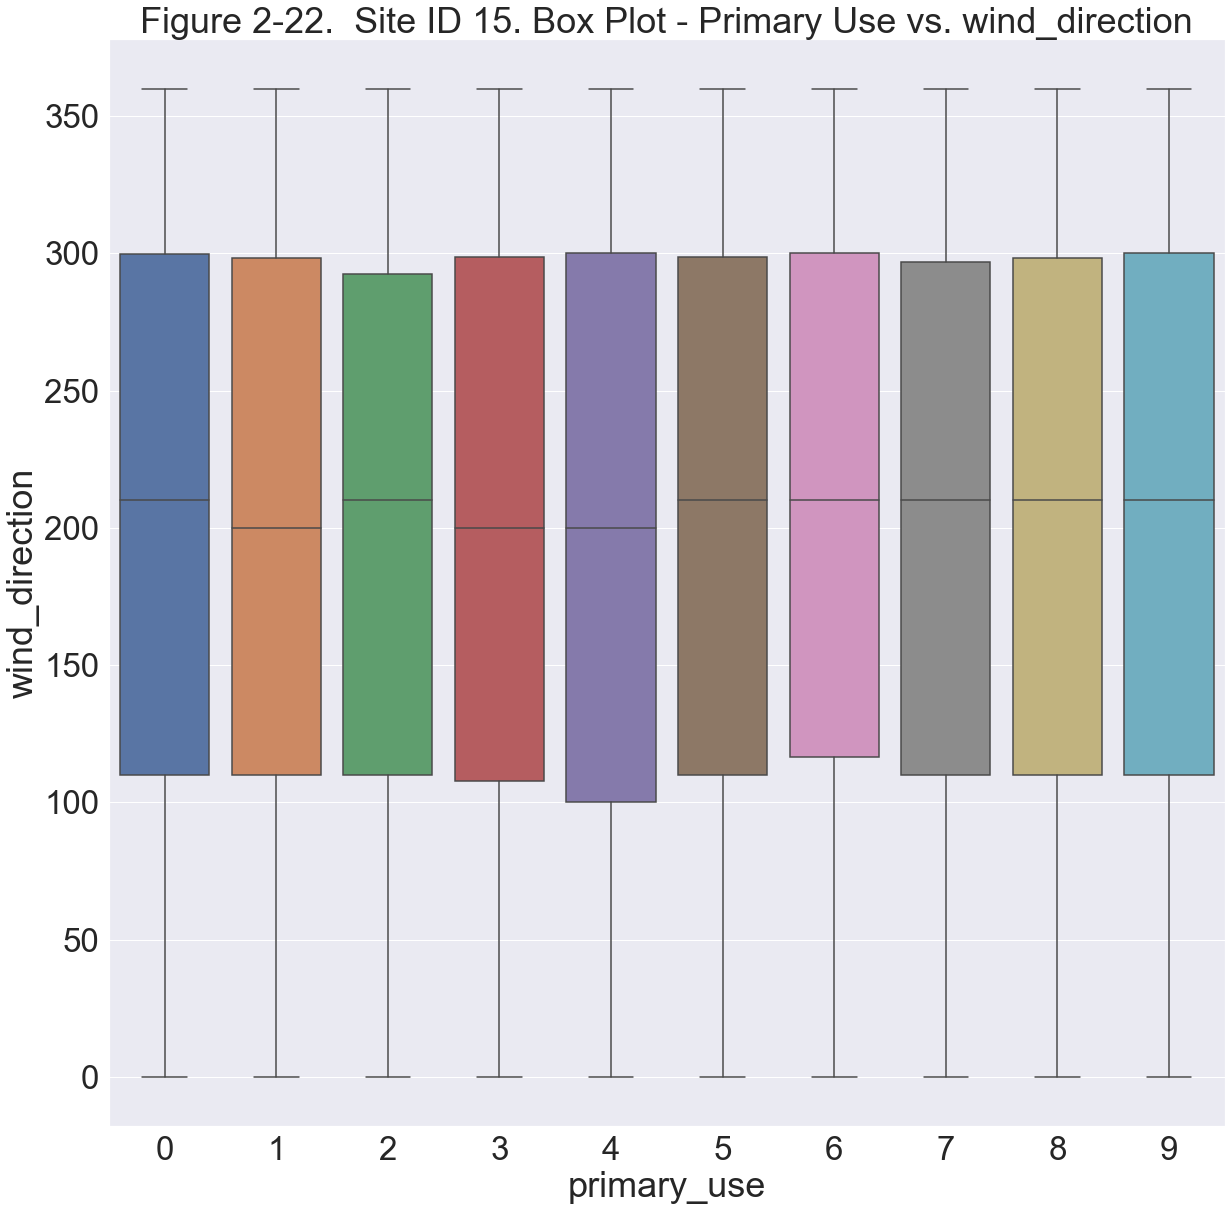

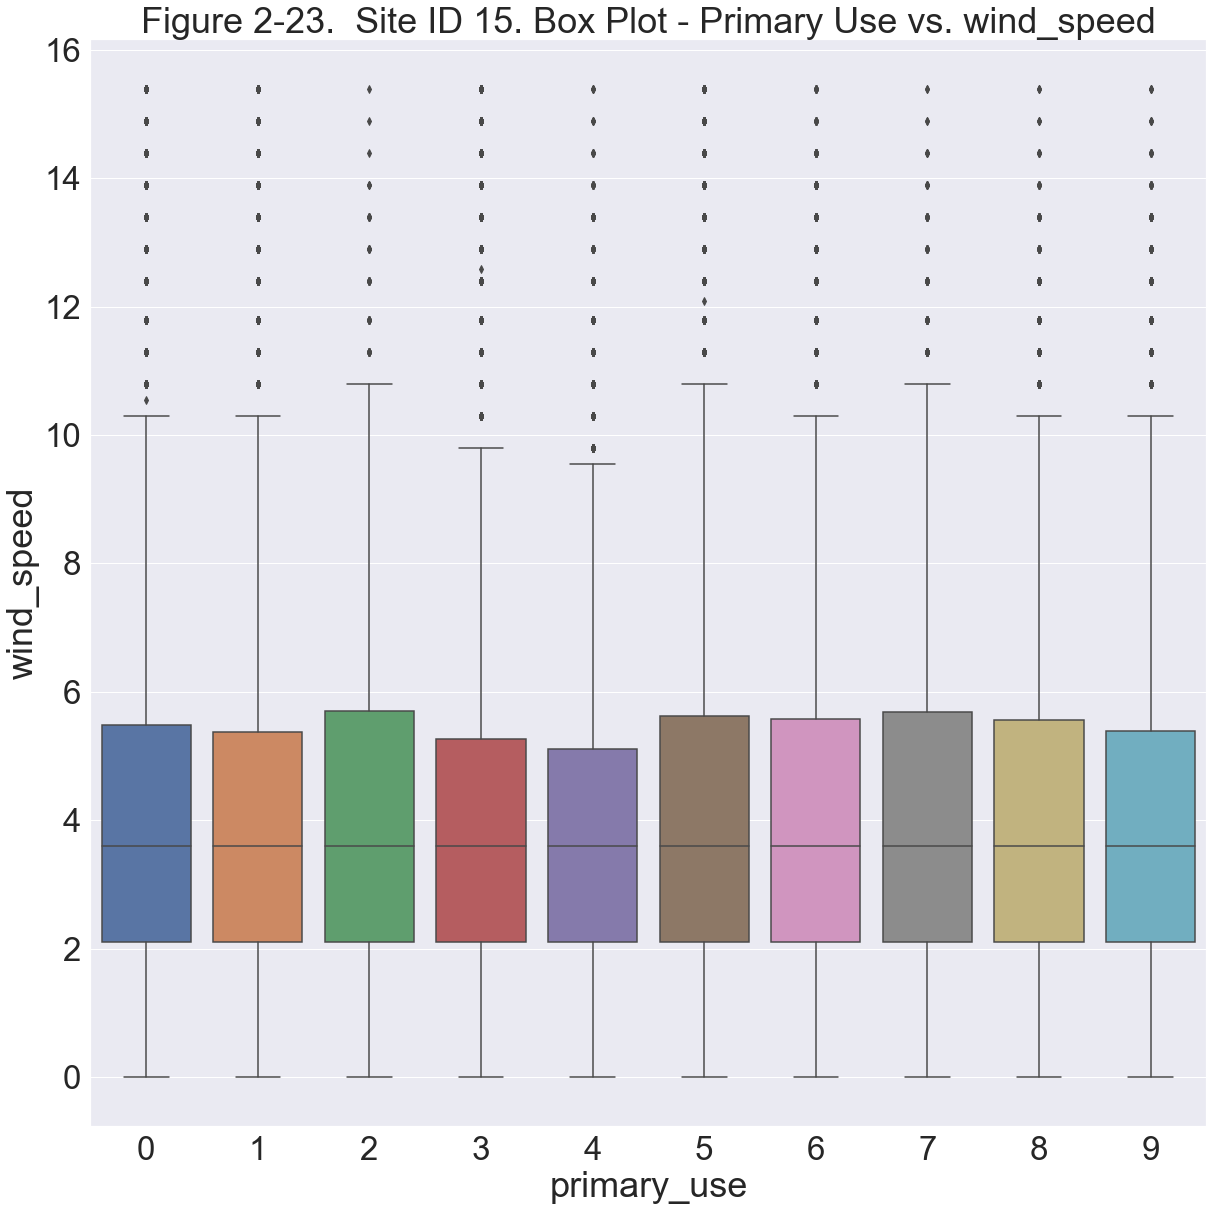

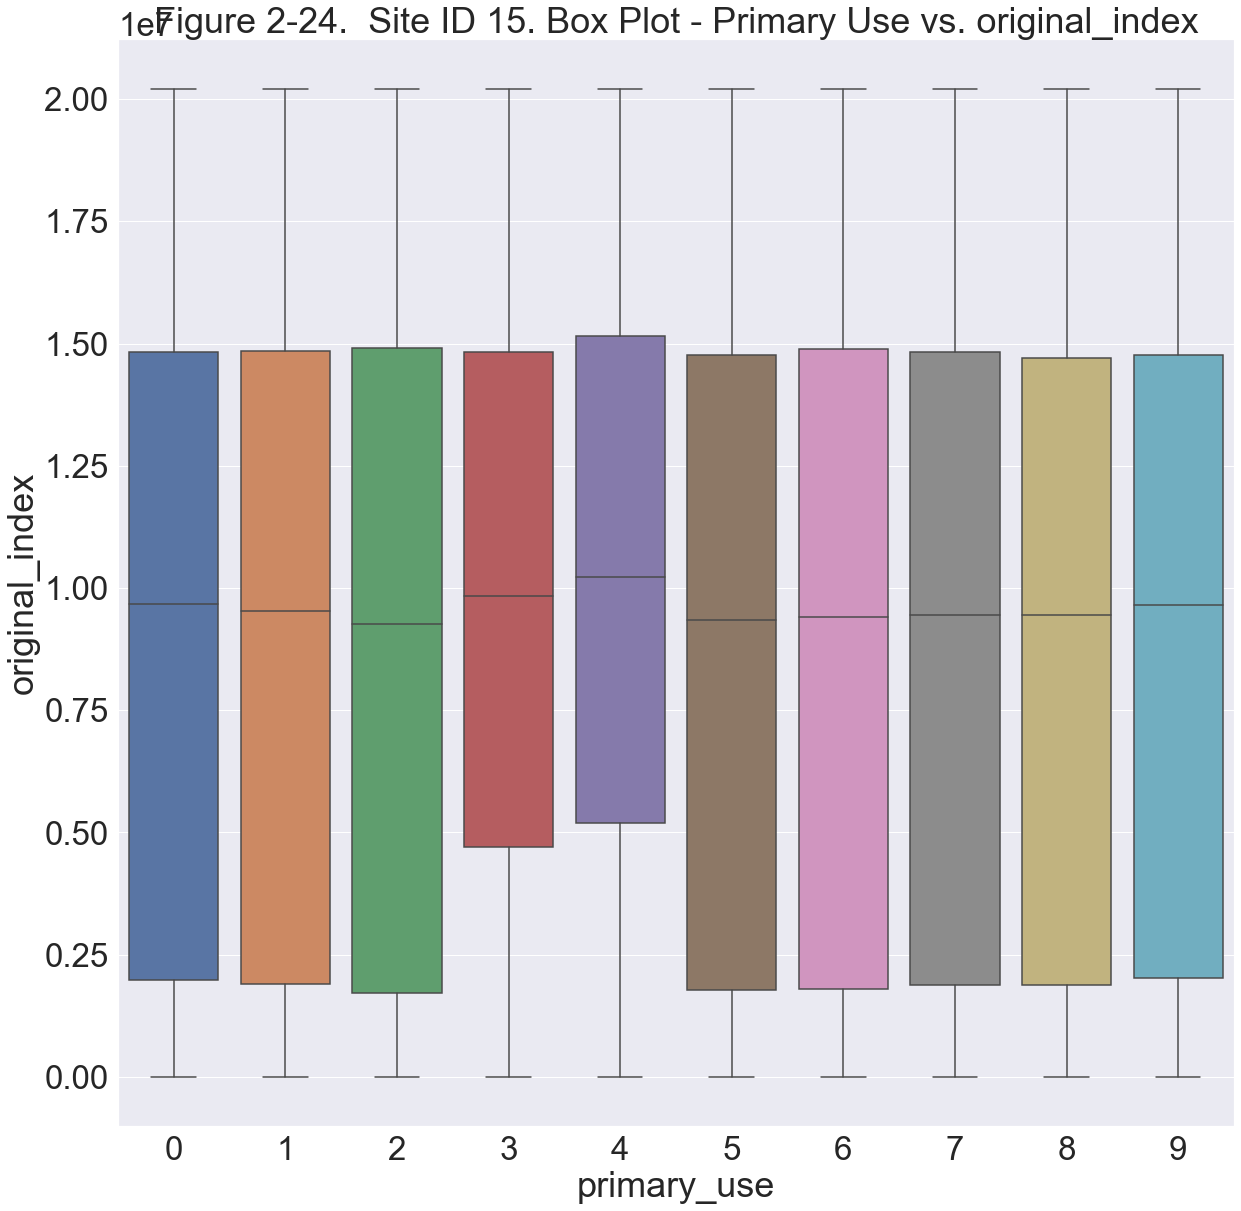

In [68]:
for name in list(data_train.drop(['timestamp','primary_use'],axis=1)):
    plt.subplots(figsize=(20, 20))
    sns.boxplot(data=data_train,x='primary_use',y=name)
    sns.set(font_scale = 3)
    plt.title('Figure 2-{}.  Site ID {}. Box Plot - Primary Use vs. {}'.format(i,Split_Number_i,name))
    plot_fig = os.path.join(figures_path[Split_Number_i],'Figure 2-{}.  Site ID {}. After Primary-Use Box Plot-{}.png'.format(i,Split_Number_i,name))
    plt.savefig(plot_fig,dpi=100,bbox_inches='tight')
    plt.show()
    i =i+ 1

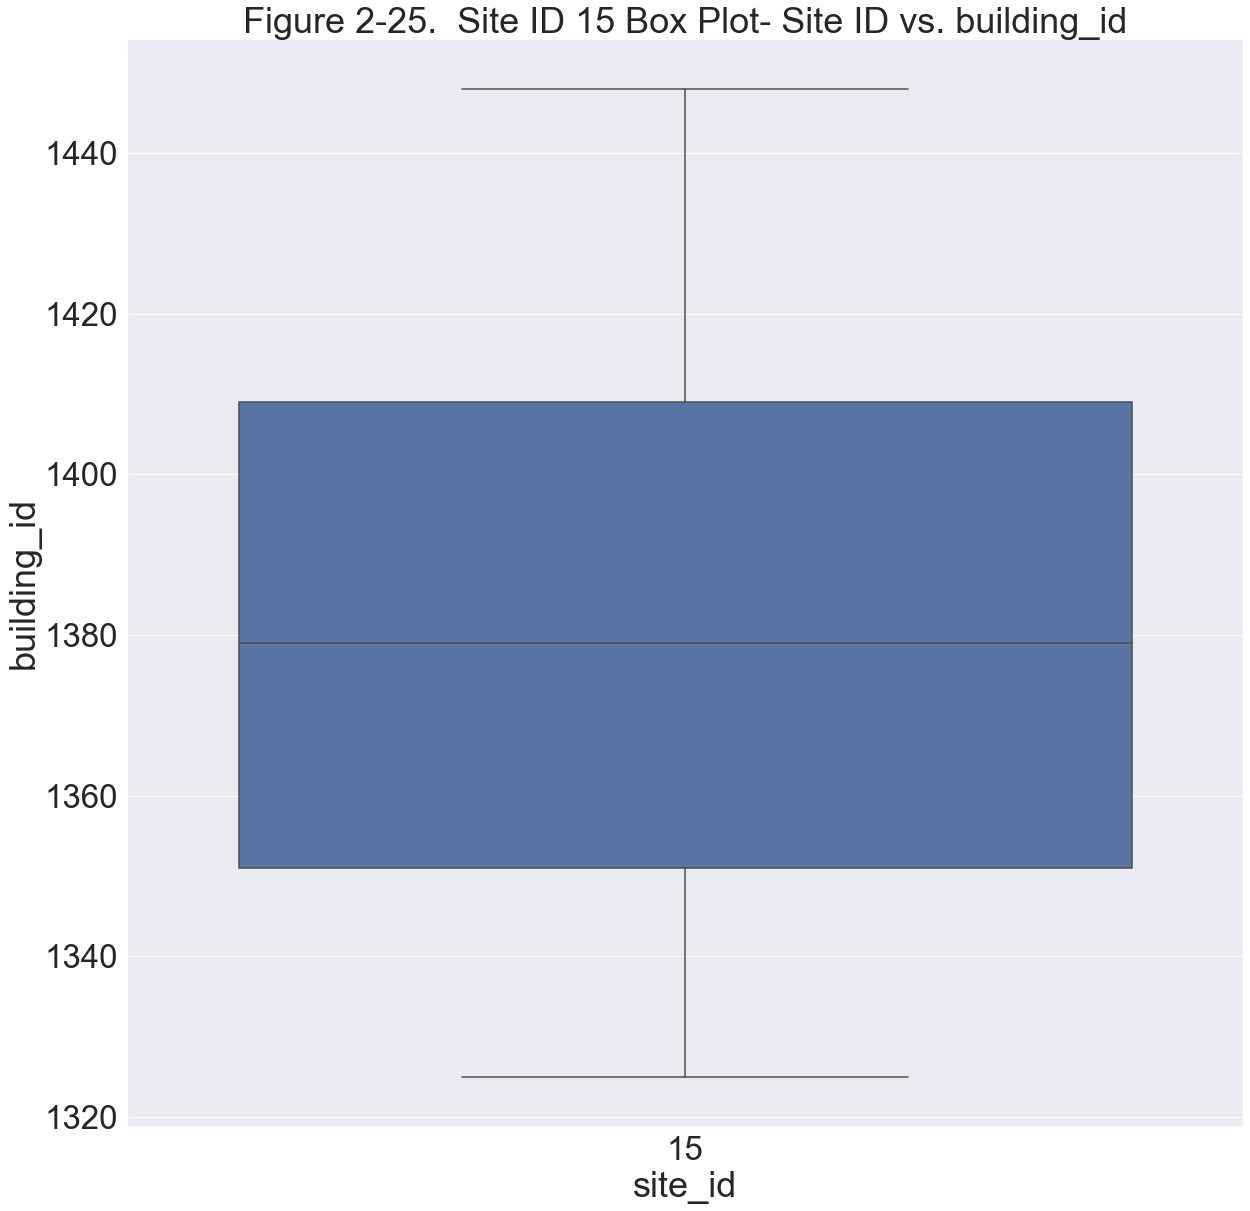

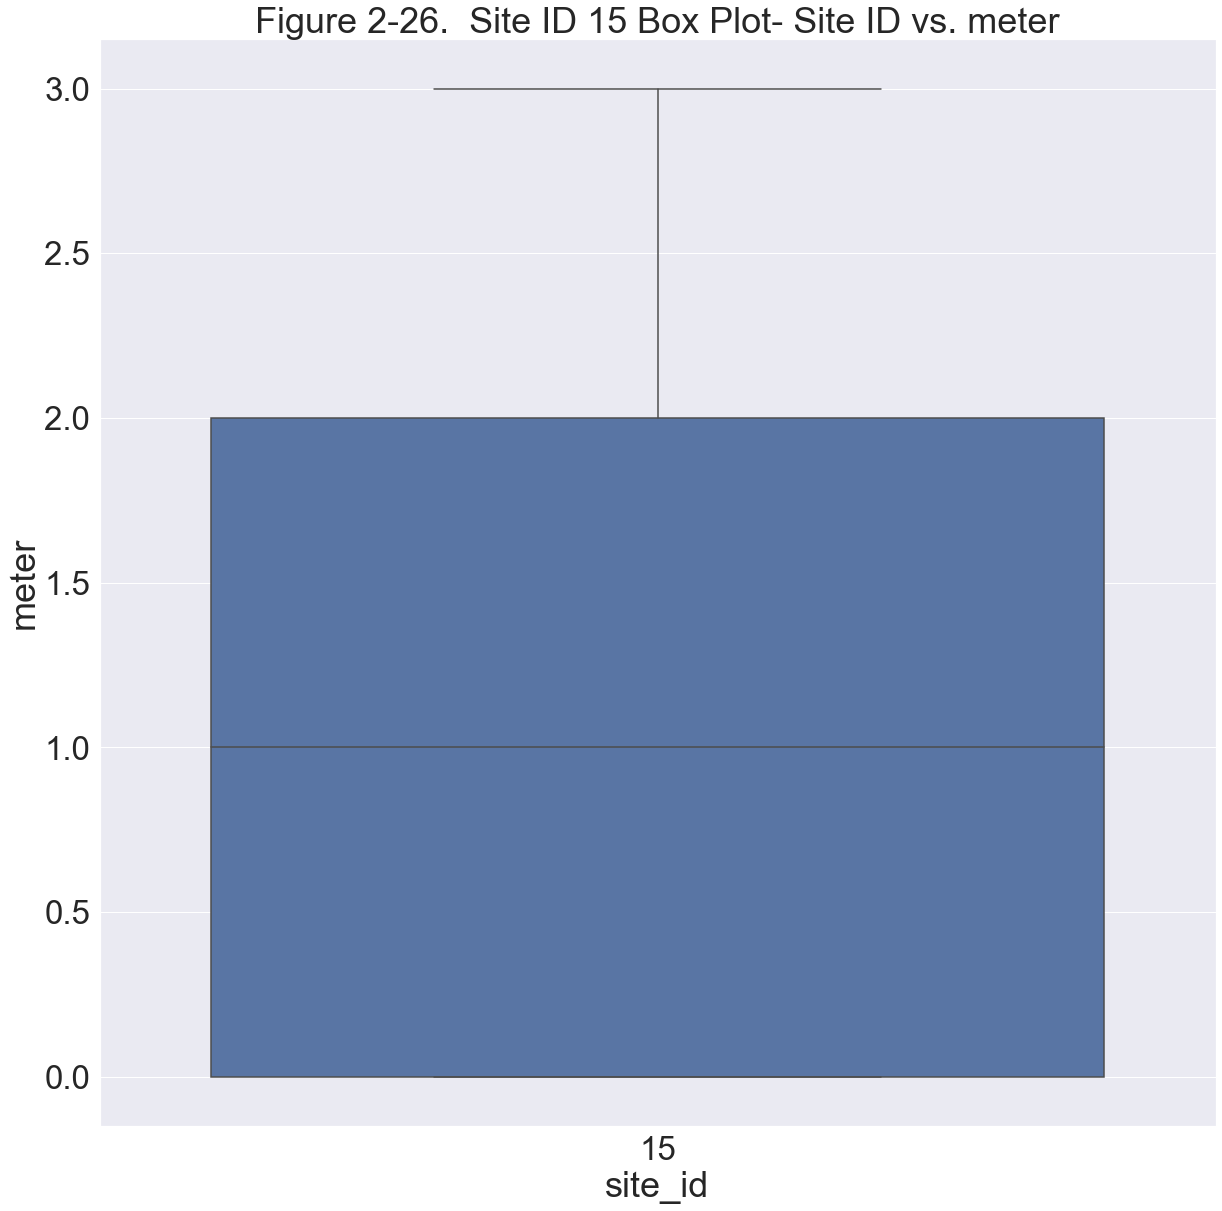

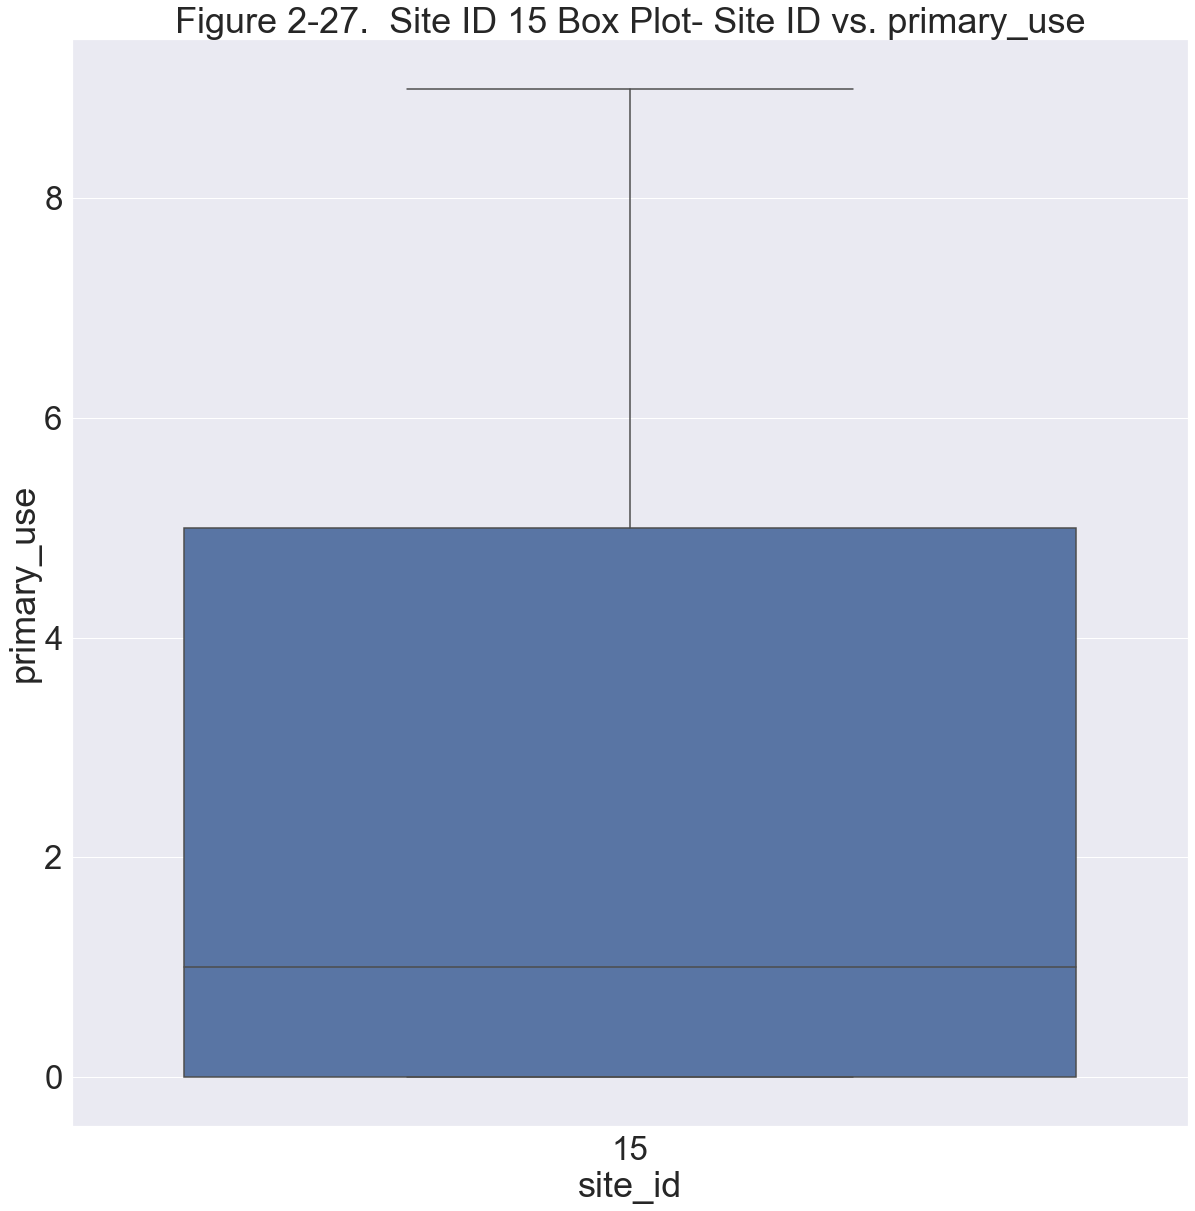

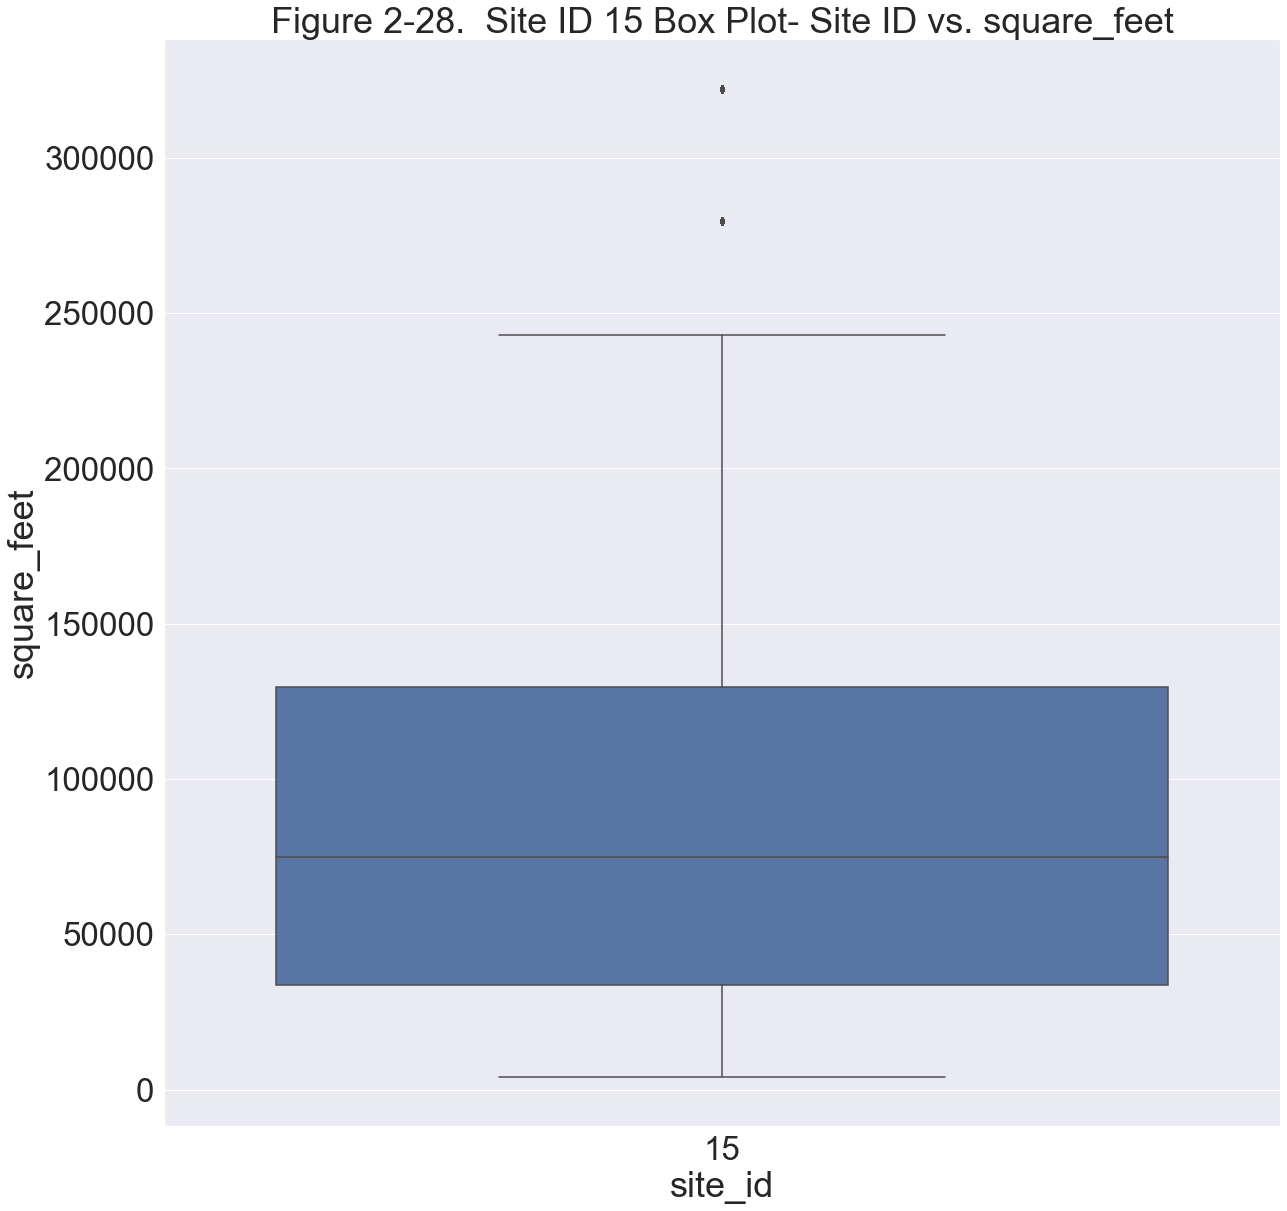

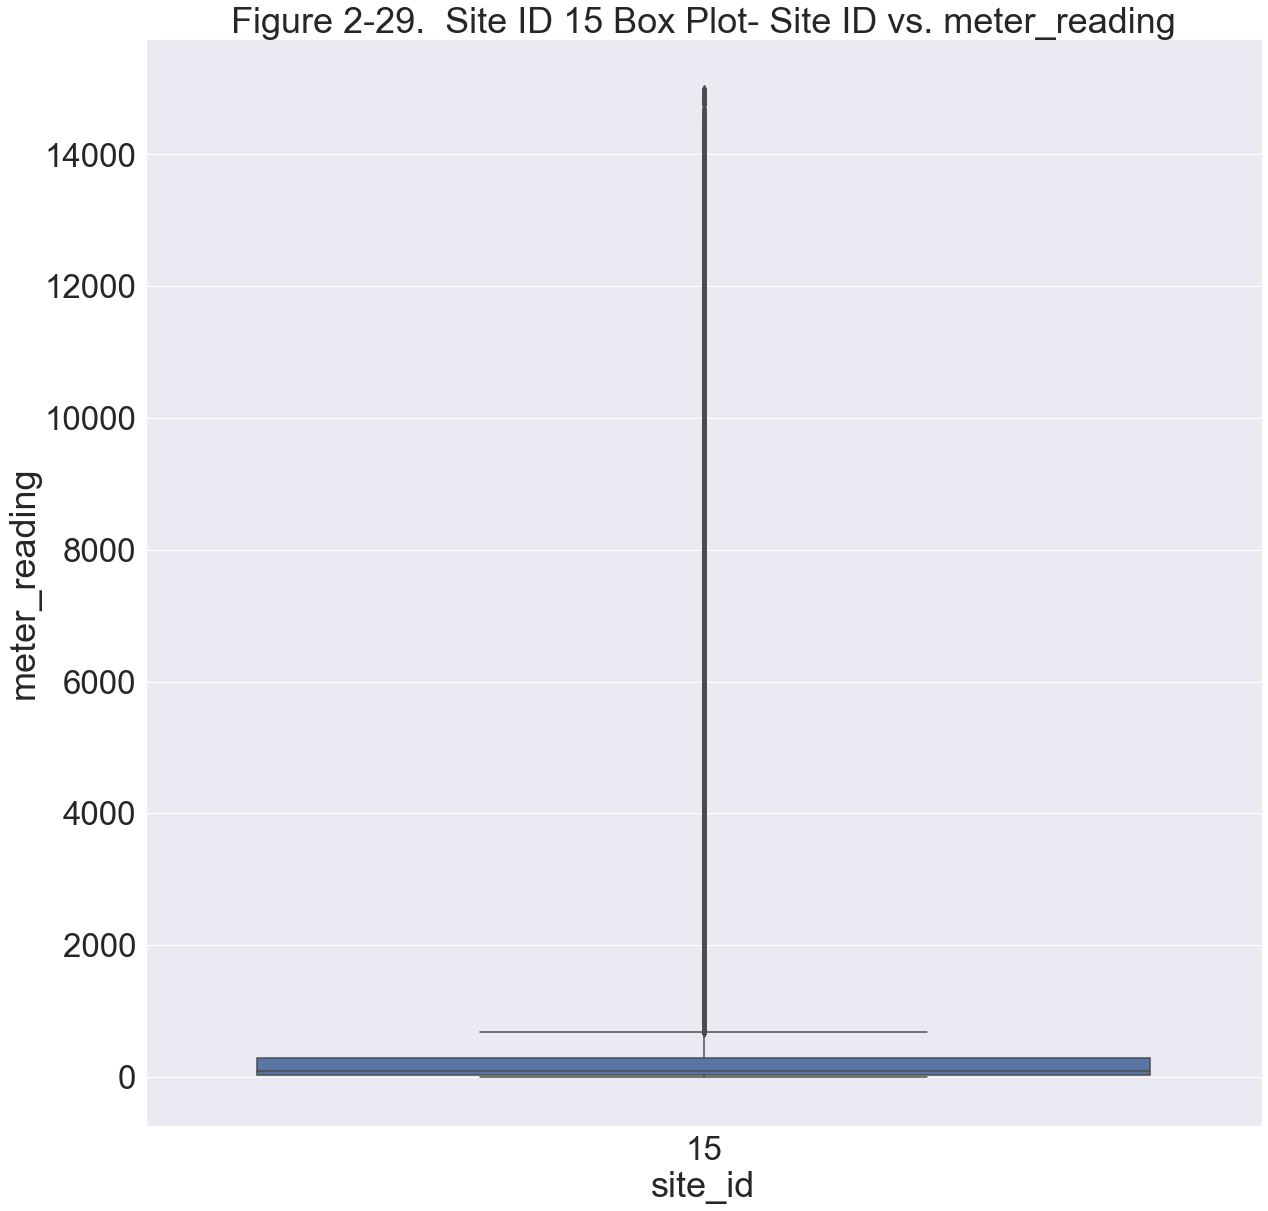

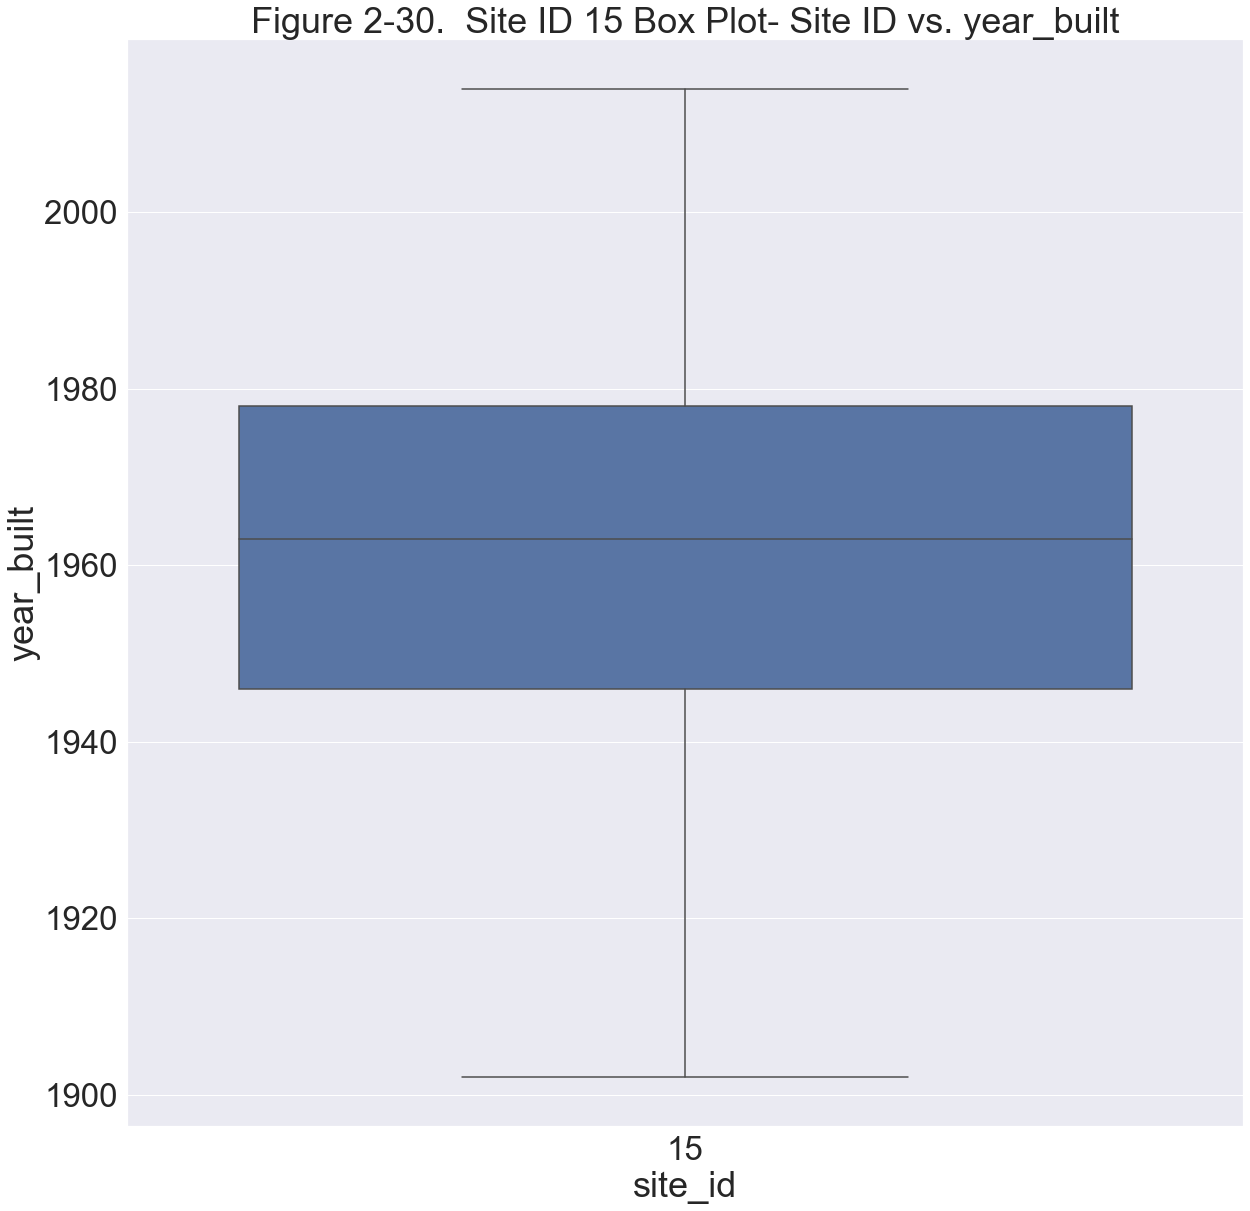

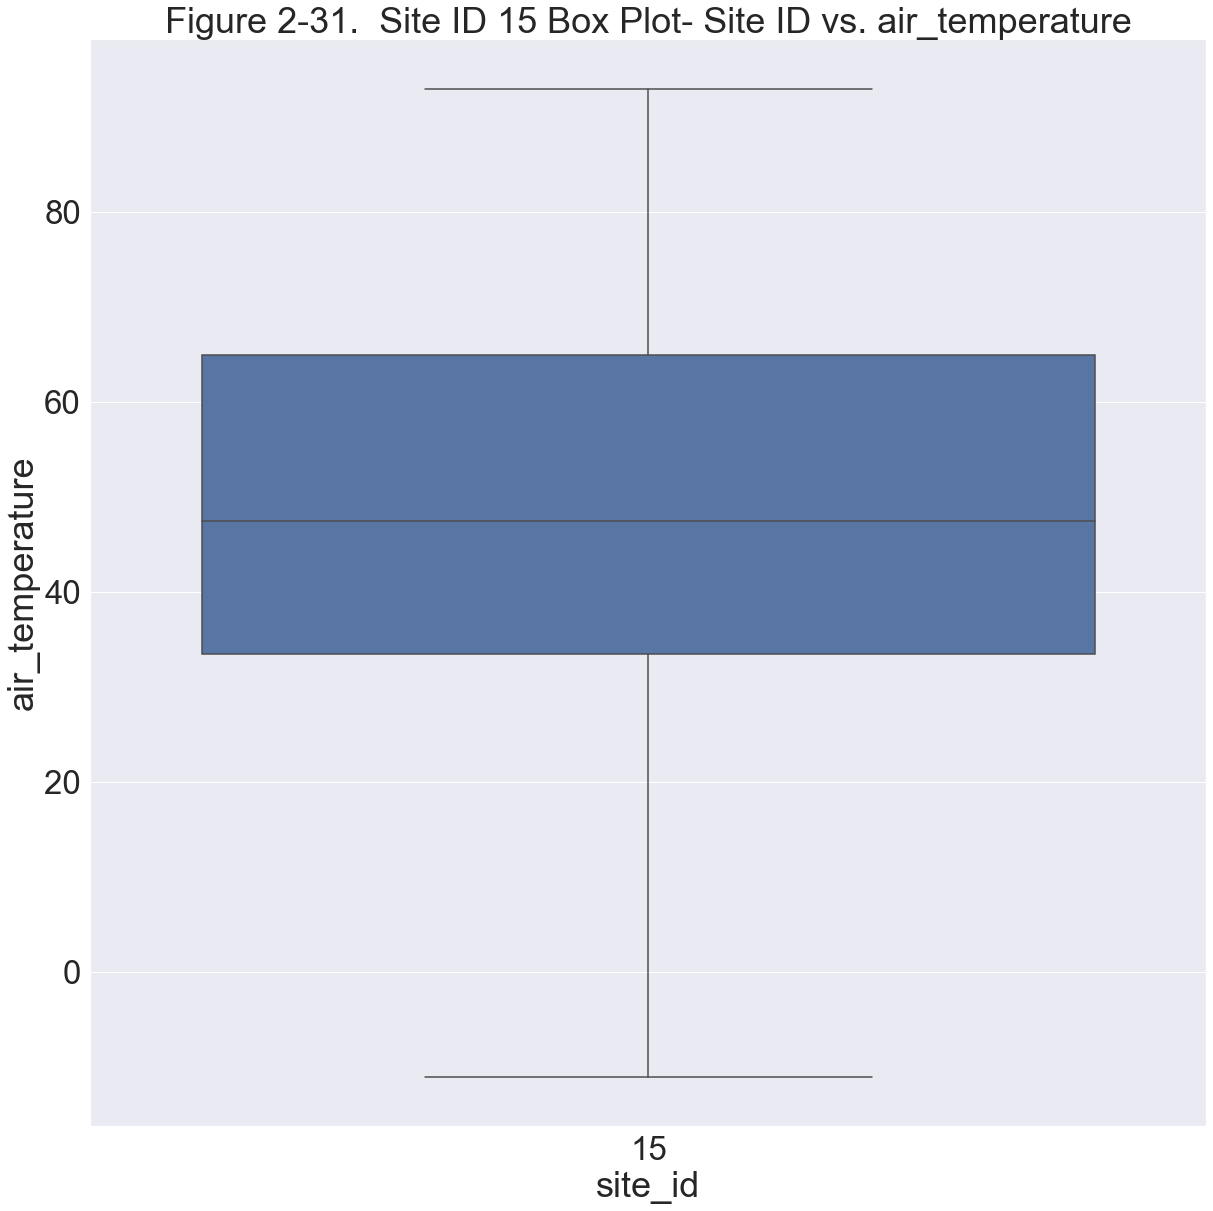

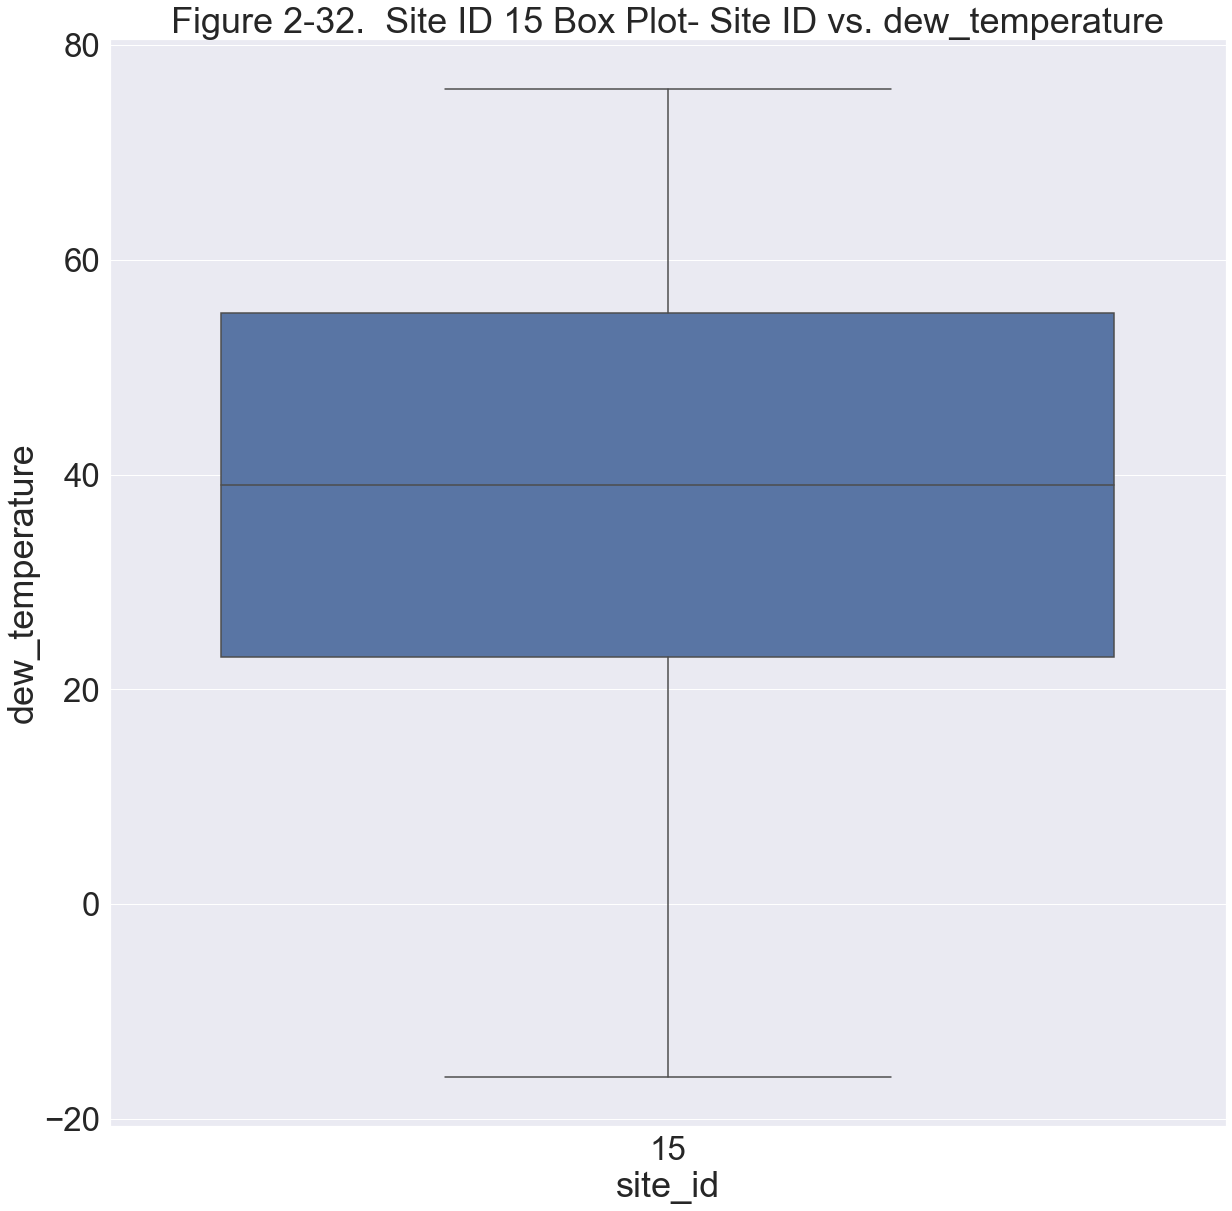

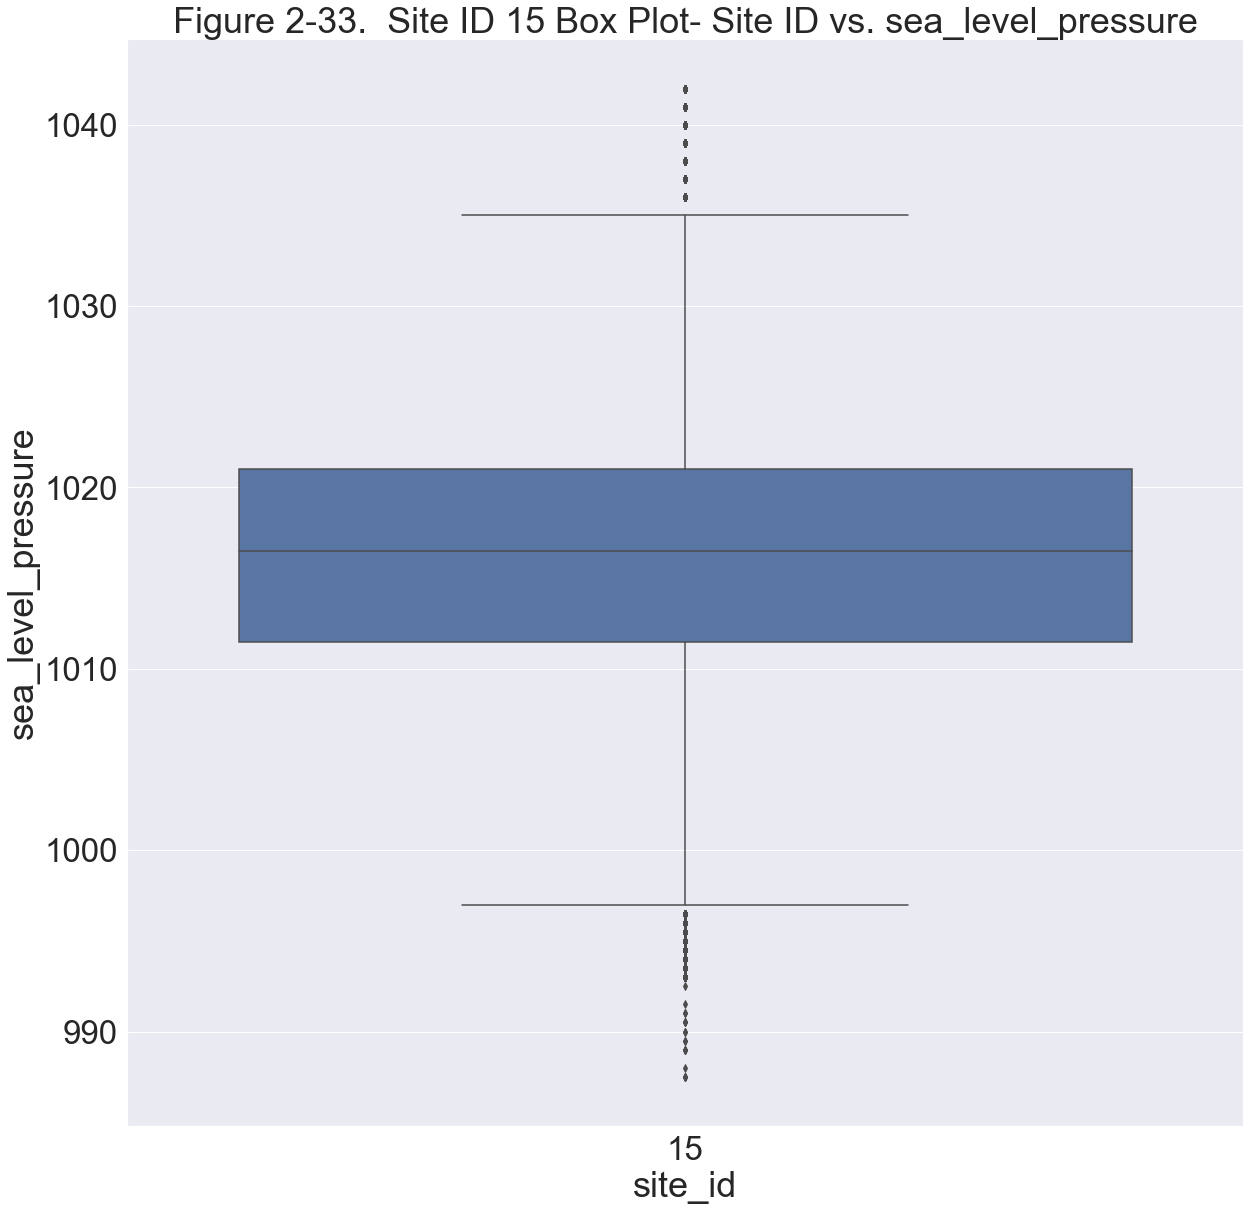

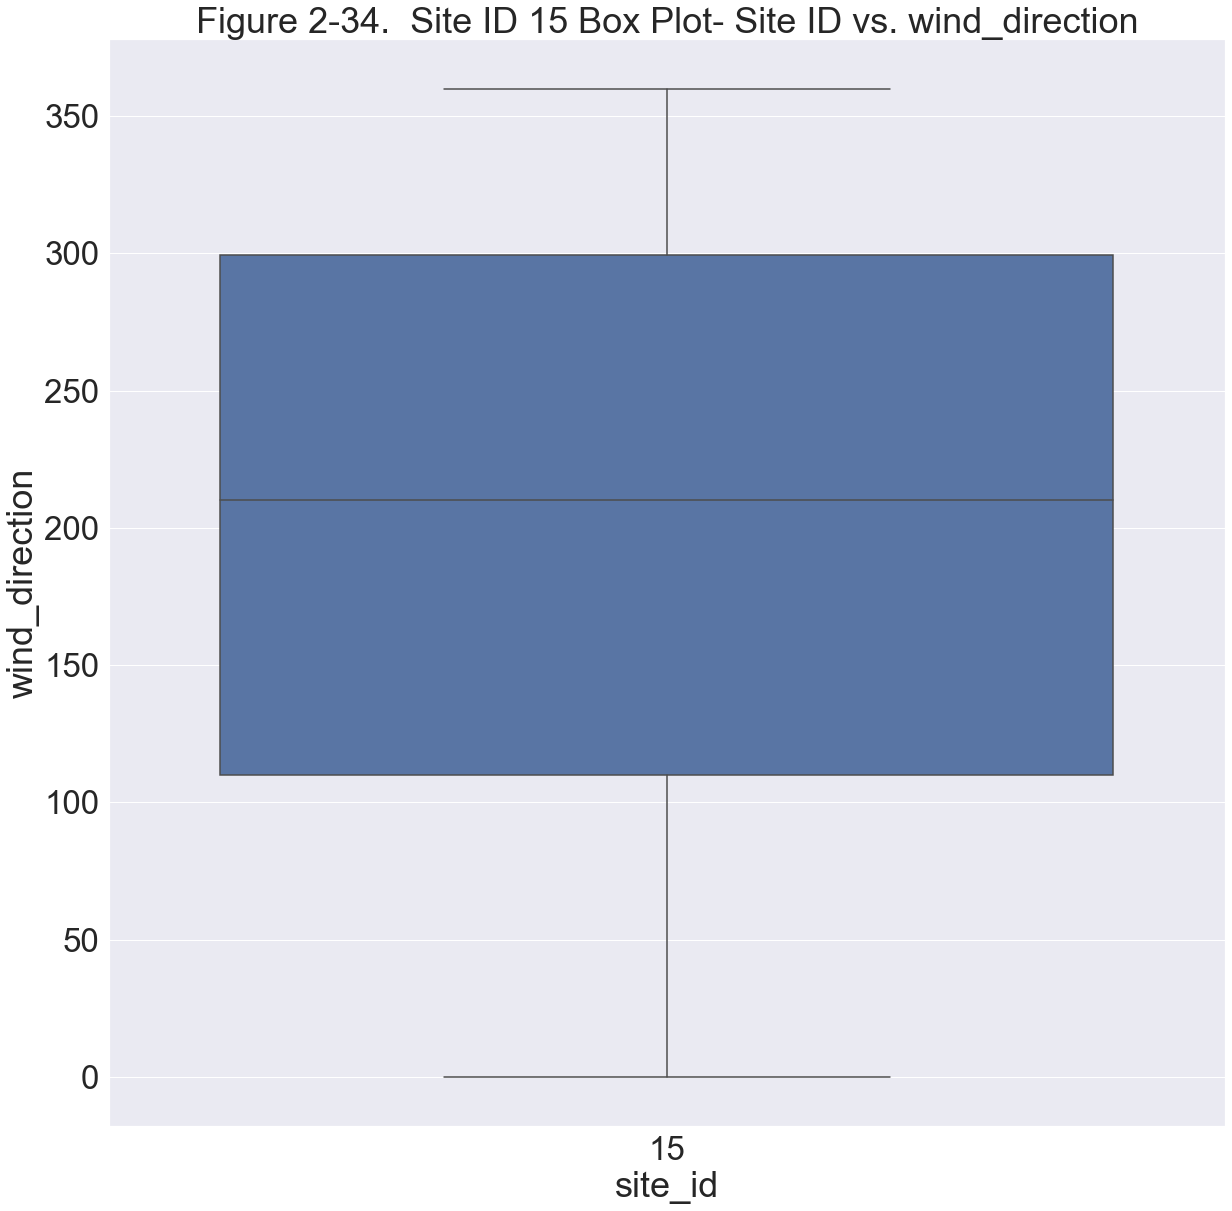

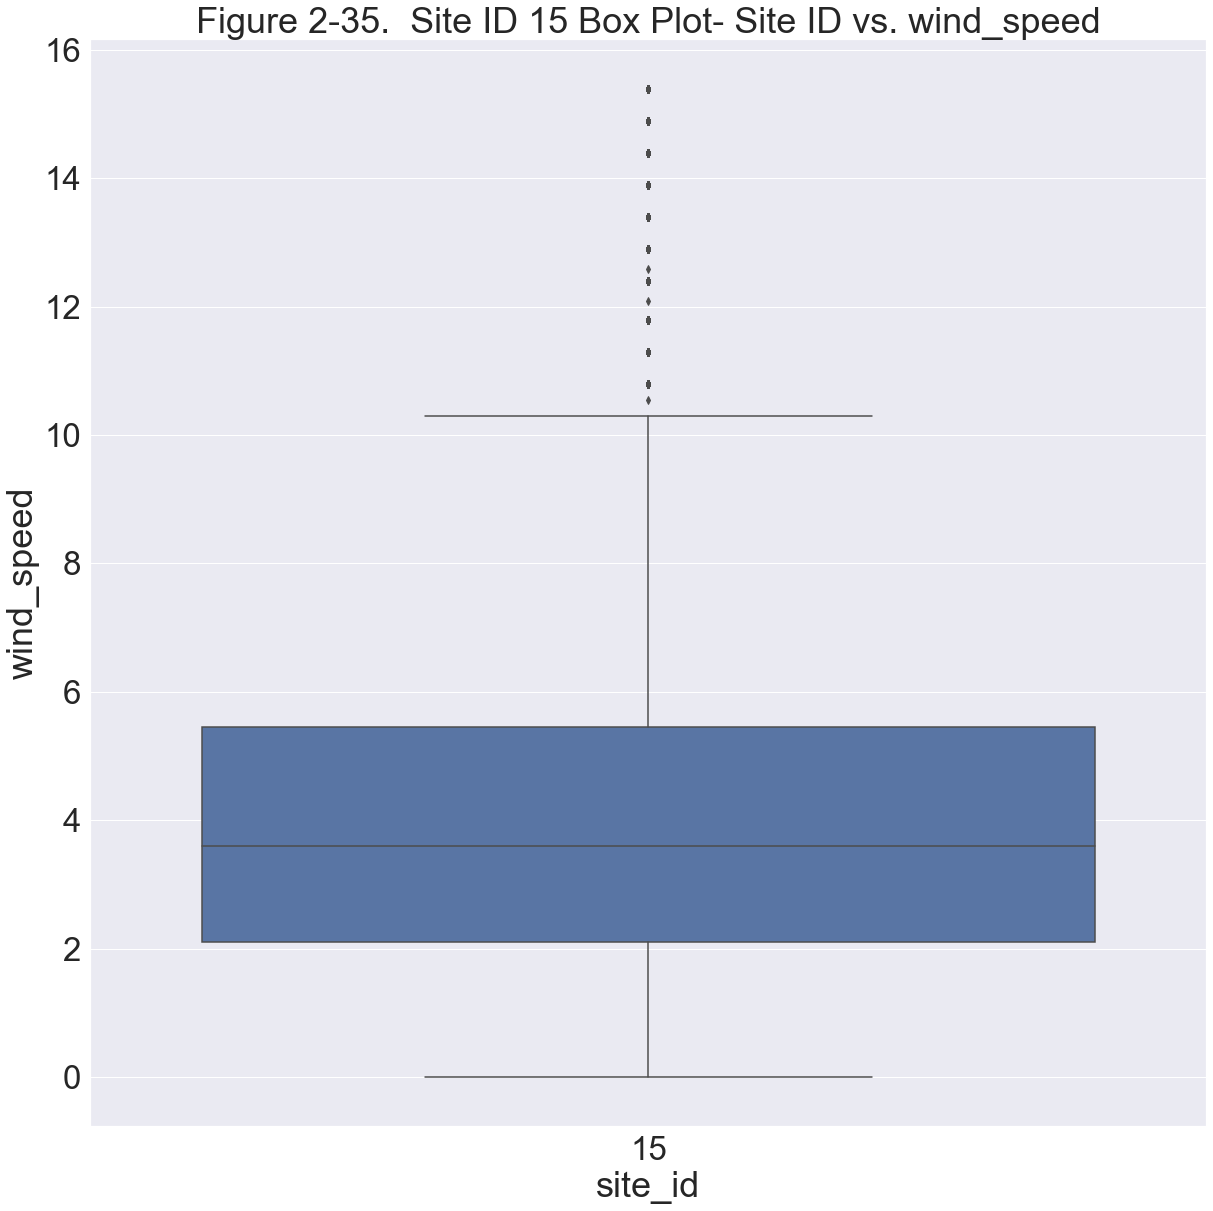

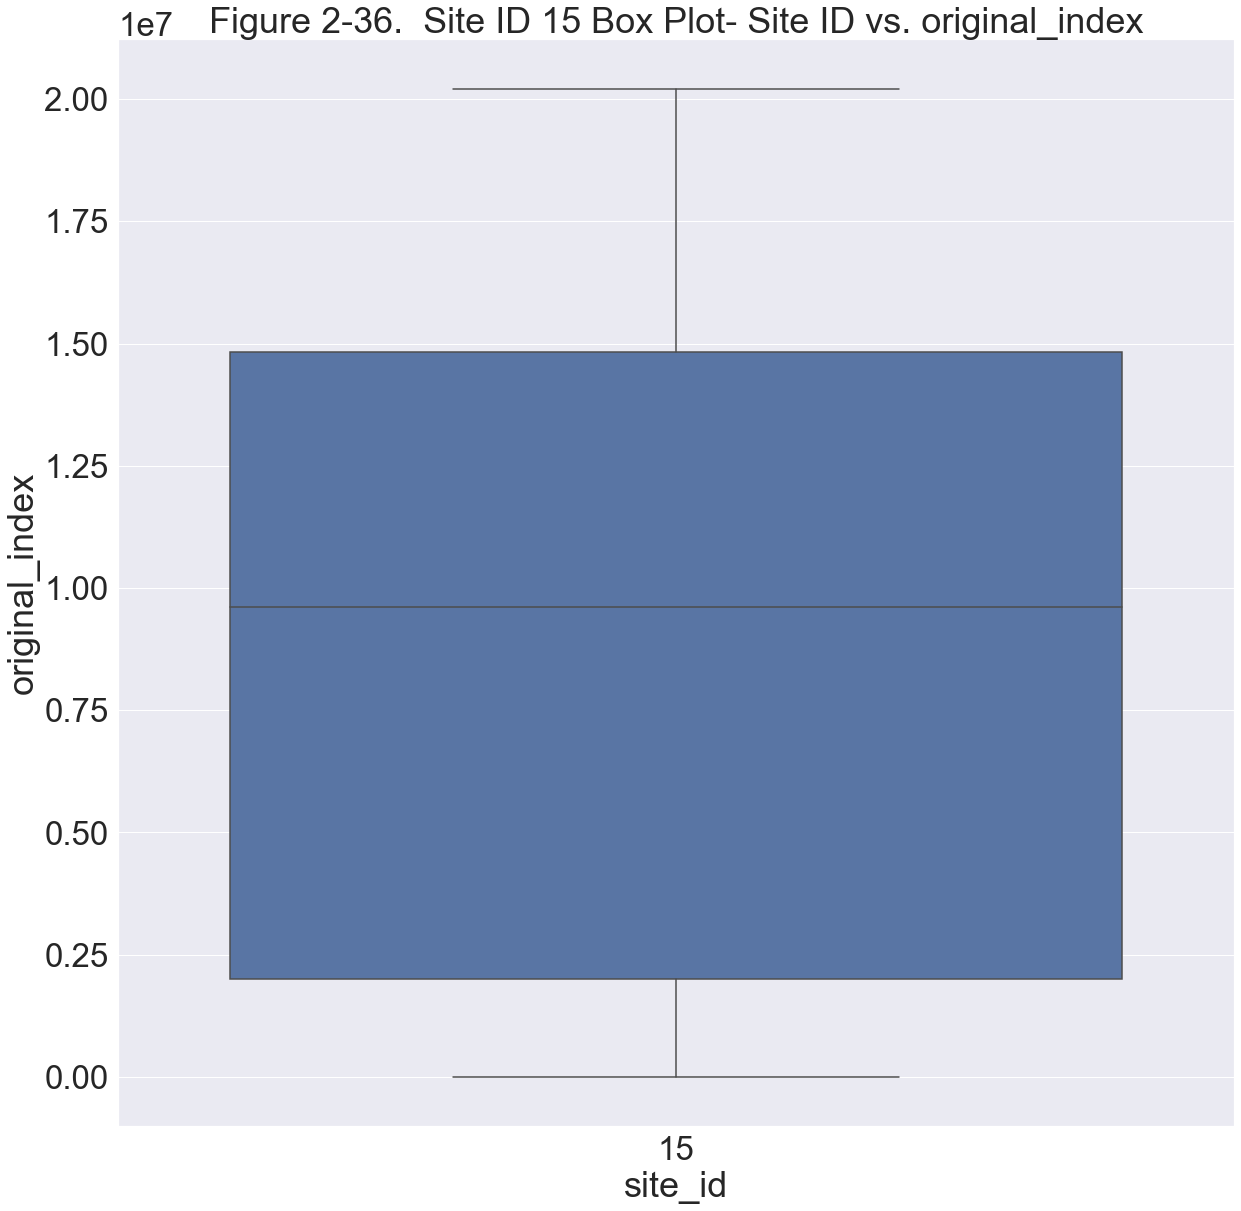

In [69]:
for name in list(data_train.drop(['timestamp','site_id'],axis=1)):
    plt.subplots(figsize=(20, 20))
    sns.boxplot(data=data_train,x='site_id',y=name)
    sns.set(font_scale = 3)
    plt.title('Figure 2-{}.  Site ID {} Box Plot- Site ID vs. {}'.format(i,Split_Number_i,name))
    plot_fig = os.path.join(figures_path[Split_Number_i],'Figure 2-{}.  After-Site ID {} -Box Plot {}.png'.format(i,Split_Number_i,name))
    plt.savefig(plot_fig,dpi=100,bbox_inches='tight')
    plt.show()
    i =i+ 1

## 2.10 Export Clean Data <a class="anchor" id="Code_Objective_2_10"></a>

In [70]:
# Reduce Memory
data_test = reduce_mem_usage(data_test)
data_train = reduce_mem_usage(data_train)

Mem. usage decreased to 137.84 Mb (0.0% reduction)
Mem. usage decreased to 84.05 Mb (0.0% reduction)


In [72]:
count=0
for Split_Number in list(Splits):  
    if count <= Split_Number_i:
        data_train.to_pickle(os.path.join(OUTPUT_split_path[count],
                               'site_id-{}-data_train_clean.pkl'.format(count)))
        data_test.to_pickle(os.path.join(OUTPUT_split_path[count],
                               'site_id-{}-data_test_clean.pkl'.format(count)))
    count+=1